<a href="https://colab.research.google.com/github/jtndr26/Lead-Scoring/blob/main/Lead_Scoring_CaseStudy_JeetendraSarpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised ML - Classification
## Contributor: Individual
## Team member: Jeetendra Sarpe.

### Business Context:
- An education company named **X** Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
- When these people fill up a form providing their email address or phone number, they are classified to be a **Lead**.The company also gets leads through past referrals.
- Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.

#### Problem Statement:
- Although X Education gets a lot of leads, its lead conversion rate is very poor,typical lead conversion rate at X education is around 30%.
- To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.
- If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


#### Business Solution:
- X Education has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.
- The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.
- The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



#### Goal of the Case study:
- Build a **Logistic Regression** model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


### Github link:
https://github.com/jtndr26/Lead-Scoring/blob/main/Lead_Scoring_CaseStudy_JeetendraSarpe.ipynb


## 1. Read and Understand Data


In [1]:
# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
%matplotlib inline

In [17]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [18]:
path = '/content/drive/My Drive/Feynn_Labs/Lead Scoring/'
lead = pd.read_csv(path+'Leads.csv')
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [19]:
lead.shape

(9240, 37)

In [20]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [21]:
# Checking null values
round(100*lead.isnull().sum()/len(lead),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [22]:
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## 2. Cleaning and Manipulating Data

As per the data dictionary provided, the Prospect ID and Lead Number needs to be unique. Hence we check them for duplicate entries,

In [23]:
# Checking for duplicates
sum(lead.duplicated(subset = 'Prospect ID')) == 0

True

In [24]:
sum(lead.duplicated(subset = 'Lead Number')) == 0

True

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & does not includes repeating entries, so we're dropping them.

In [25]:
lead.drop(['Prospect ID','Lead Number'],axis = 1 ,inplace = True)
lead.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                   Select   
1             Email Opened   India                   Select   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Select                   02.Medium                  02.Medium   
1  Select                   02.Medium                 

We also observed, there are many variables with null values, let's drop the variables with null values more tahn 40%

In [26]:
col = lead.columns
drp1 = []
for i in col:
    if (100*lead[i].isnull().sum()/len(lead)) >= 40:
        lead.drop(i,1,inplace = True)
        drp1.append(i)
print(lead.shape)
print(drp1)

(9240, 30)
['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


Above are the 7 dropped columns which were having null values more than 40

Let's check how many different categories are provided for each variables.

In [27]:
lead.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

The above description show the number of different categories for each variable.

In [28]:
lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [29]:
lead.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

Lead Origin has 5 categories whereas Country has 38 different categories, likewise there are few variables with only single category and it better to drop them

In [30]:
# dropping variables with single/one category
col = lead.columns
drp2 = []
for i in col:
    if lead[i].nunique() == 1:
        lead.drop(i,1,inplace = True)
        drp2.append(i)
print(lead.shape)
print(drp2)

(9240, 25)
['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [31]:
# Let's check the remaining null values
round(100*lead.isnull().sum()/len(lead),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [32]:
lead['Country'].value_counts(dropna = False,normalize = True)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [33]:
lead[lead.Country.isnull()].Converted.sum()

1076

In [34]:
lead[lead.Country.isnull()].count()

Lead Origin                                      2461
Lead Source                                      2426
Do Not Email                                     2461
Do Not Call                                      2461
Converted                                        2461
TotalVisits                                      2324
Total Time Spent on Website                      2461
Page Views Per Visit                             2324
Last Activity                                    2358
Country                                             0
Specialization                                   1615
How did you hear about X Education               1606
What is your current occupation                  1605
What matters most to you in choosing a course    1605
Search                                           2461
Newspaper Article                                2461
X Education Forums                               2461
Newspaper                                        2461
Digital Advertisement       

The above descriptions indicates there is good number of Leads with entries where the country name is not provided(NaN).Hence we will not drop the NaN values, however in country variable India cover 70 % of the data so we can club the remaining entries together.  

In [35]:
lead['Country'].replace(np.nan,'India',inplace = True)
lead.Country.isnull().sum()

0

In [36]:
# Clubbing rest of the countries as one category
def club(x):
    category = ''
    if x == 'India':
        category = 'India'
    else:
        category = 'Foreign'
    return category
lead['Country'] = lead.apply(lambda x:club(x['Country']),axis = 1)
lead.Country.value_counts()

India      8953
Foreign     287
Name: Country, dtype: int64

In [37]:
lead['Specialization'].value_counts(dropna = False,normalize = True)

Select                               0.210173
NaN                                  0.155628
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

Here in Specialization, we find some entries are not been selected and by default the 'Select' button have been assigned for such entries. We'll drop these entries alongwith null values.

In [38]:
lead['Specialization'] = lead.Specialization[~lead['Specialization'].isin( ['Select'])]
lead['Specialization'].value_counts(normalize = True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

As we observe, there are different Management categories diversified in different streams. For our simplification, we'll replace them with Management.

In [39]:
lead.dropna(subset = ['Specialization'],inplace = True)

In [40]:
specs = lead['Specialization'].unique()
drp3 = []
for i in specs:
    if i.title().find('Management')!= -1:
        lead['Specialization'] = lead['Specialization'].replace(i,'Management')
        drp3.append(i)
print(drp3)     # replaced categories
lead['Specialization'].value_counts()

['Supply Chain Management', 'IT Projects Management', 'Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'Retail Management', 'Hospitality Management', 'Healthcare Management']


Management                           4253
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [41]:
lead['How did you hear about X Education'].value_counts(dropna = False,normalize = True)

Select                   0.536177
Online Search            0.134983
NaN                      0.131399
Word Of Mouth            0.058874
Student of SomeSchool    0.051877
Other                    0.030717
Multiple Sources         0.025256
Advertisements           0.011433
Social Media             0.011433
Email                    0.004096
SMS                      0.003754
Name: How did you hear about X Education, dtype: float64

This variables have almost 55% of the entries which aren't filled and 23% are missing. Instead of replacing these many values it is better to drop this variable.

In [42]:
# Dropping 'How did you hear about X Education'
lead.drop('How did you hear about X Education',axis = 1,inplace = True)
# Let's have a look at the missing values status now
round(100*lead.isnull().sum()/len(lead),2)

Lead Origin                                       0.00
Lead Source                                       0.14
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.04
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.04
Last Activity                                     0.84
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  21.45
What matters most to you in choosing a course    21.47
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [43]:
# Tags
lead['Tags'].value_counts(dropna = False,normalize = True)

Will revert after reading the email                  0.303413
NaN                                                  0.243174
Ringing                                              0.148976
Already a student                                    0.048464
Interested in other courses                          0.045563
Closed by Horizzon                                   0.044710
switched off                                         0.030717
Busy                                                 0.026962
Lost to EINS                                         0.023379
Not doing further education                          0.018942
Interested  in full time MBA                         0.014164
Graduation in progress                               0.012457
invalid number                                       0.011433
Diploma holder (Not Eligible)                        0.007338
wrong number given                                   0.006314
opp hangup                                           0.004608
number n

The variable Tags refer to Tags assigned to customers indicating the current status of the lead. We may replace the missing values with next highest occuring value, but this will surely affect the end result and we are uncertain about the status of such customers. Hence we drop this variable.


In [44]:
# Dropping Tags
lead.drop('Tags',axis = 1,inplace = True)

In [45]:
# Lead Profile
lead['Lead Profile'].value_counts(dropna = False,normalize = True)

Select                         0.435666
Potential Lead                 0.247611
NaN                            0.214676
Other Leads                    0.071160
Student of SomeSchool          0.023891
Lateral Student                0.003925
Dual Specialization Student    0.003072
Name: Lead Profile, dtype: float64

Again we have the same situation like earlier and we react in the same way as around 70% of the values needs to imputed and this may definately affect the analysis.

In [46]:
# dropping Lead Profile
lead.drop('Lead Profile',axis = 1,inplace = True)

In [47]:
# What matters most to you in choosing a course
lead['What matters most to you in choosing a course'].value_counts(dropna = False,normalize = True)

Better Career Prospects      0.784812
NaN                          0.214676
Flexibility & Convenience    0.000341
Other                        0.000171
Name: What matters most to you in choosing a course, dtype: float64

In [48]:
# Replacing missing values with Other entries
lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects',inplace = True)
lead['What matters most to you in choosing a course'].value_counts(dropna = False,normalize = True)

Better Career Prospects      0.999488
Flexibility & Convenience    0.000341
Other                        0.000171
Name: What matters most to you in choosing a course, dtype: float64

We replace the missing values as above because the main objective of masses to pursue Online learning is having better career opportunities

In [49]:
# What is your current occupation
lead['What is your current occupation'].value_counts(dropna = False,normalize = True)

Unemployed              0.643686
NaN                     0.214505
Working Professional    0.115188
Student                 0.021331
Other                   0.002560
Housewife               0.001706
Businessman             0.001024
Name: What is your current occupation, dtype: float64

Let's just suppose a customer is opting for this platform, there are two major possibilities that this customer may be a Working Professional or an Unemployed person. Since the main objective to pursue online learning is Upskilling and getting better opportunities and such goals reasonalbly go with these two categories.
As such the Unemployed category is higher in number hence we replace missing values with this category.

In [50]:
# Replacing missing values with Unemployed
lead['What is your current occupation'].replace(np.nan,'Unemployed',inplace = True)
lead['What is your current occupation'].value_counts(dropna = False,normalize = True)

Unemployed              0.858191
Working Professional    0.115188
Student                 0.021331
Other                   0.002560
Housewife               0.001706
Businessman             0.001024
Name: What is your current occupation, dtype: float64

In [51]:
# Let's have a looka at the missing values status again
round(100*lead.isnull().sum()/len(lead),2)

Lead Origin                                      0.00
Lead Source                                      0.14
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.04
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.04
Last Activity                                    0.84
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [52]:
# City
lead['City'].value_counts(dropna = False,normalize = True)

Mumbai                         0.532594
Thane & Outskirts              0.123038
Other Cities                   0.112116
Select                         0.080887
Other Cities of Maharashtra    0.073038
Other Metro Cities             0.063652
Tier II Cities                 0.012628
NaN                            0.002048
Name: City, dtype: float64

Since the platform provides Online courses it is unfair to say that only customers from big cities enquiry and as there is larger number of values that needs to be imputed we drop this variable also.

In [53]:
# Dropping City and checking missing values
lead.drop('City',axis = 1,inplace = True)
round(100*lead.isnull().sum()/len(lead),2)

Lead Origin                                      0.00
Lead Source                                      0.14
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.04
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.04
Last Activity                                    0.84
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [54]:
lead['Lead Source'].value_counts(dropna = False,normalize = True)

Direct Traffic       0.406314
Google               0.336007
Organic Search       0.134300
Reference            0.066553
Olark Chat           0.041297
Referral Sites       0.005973
Facebook             0.002730
Welingak Website     0.002560
NaN                  0.001365
Click2call           0.000683
Press_Release        0.000341
bing                 0.000341
Social Media         0.000341
WeLearn              0.000171
Pay per Click Ads    0.000171
welearnblog_Home     0.000171
youtubechannel       0.000171
testone              0.000171
blog                 0.000171
NC_EDM               0.000171
Name: Lead Source, dtype: float64

We replace missing values with Others, also there a value 'google' which is nothing but Google which also will be replaced

In [55]:
lead['Lead Source'] = lead['Lead Source'].replace({np.nan:'Others','google':'Google'})
lead['Lead Source'].value_counts(dropna = False,normalize = True)

Direct Traffic       0.406314
Google               0.336007
Organic Search       0.134300
Reference            0.066553
Olark Chat           0.041297
Referral Sites       0.005973
Facebook             0.002730
Welingak Website     0.002560
Others               0.001365
Click2call           0.000683
Press_Release        0.000341
bing                 0.000341
Social Media         0.000341
WeLearn              0.000171
Pay per Click Ads    0.000171
welearnblog_Home     0.000171
youtubechannel       0.000171
testone              0.000171
blog                 0.000171
NC_EDM               0.000171
Name: Lead Source, dtype: float64

In [56]:
# Also lets combine some other categories into one category
lead['Lead Source'] = lead['Lead Source'].replace(['Facebook','youtubechannel','blog'],'Social Media')
lead['Lead Source'] = lead['Lead Source'].replace({'Pay per Click Ads':'Direct Traffic','Welingak Website':'Referral Sites'})
lead['Lead Source'] = lead['Lead Source'].replace(['NC_EDM','Press_Release'],'Reference')
lead['Lead Source'] = lead['Lead Source'].replace({'Olark Chat':'Live Chat','welearnblog_Home':'WeLearn','bing':'Organic Search'})
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call','testone'],'Others')
lead['Lead Source'].value_counts(normalize = True)

Direct Traffic    0.406485
Google            0.336007
Organic Search    0.134642
Reference         0.067065
Live Chat         0.041297
Referral Sites    0.008532
Social Media      0.003413
Others            0.002218
WeLearn           0.000341
Name: Lead Source, dtype: float64

In [57]:
# TotalVisits
lead['TotalVisits'].value_counts(dropna = False,normalize = True)

2.0      0.189249
3.0      0.168259
4.0      0.160922
5.0      0.113823
0.0      0.081058
6.0      0.066553
7.0      0.042833
1.0      0.042662
8.0      0.033447
9.0      0.024061
10.0     0.016382
11.0     0.011775
NaN      0.010410
12.0     0.006997
13.0     0.005973
14.0     0.005631
15.0     0.003072
18.0     0.002389
16.0     0.002389
17.0     0.002218
20.0     0.001877
19.0     0.001365
21.0     0.001024
23.0     0.000853
27.0     0.000853
24.0     0.000683
22.0     0.000512
25.0     0.000512
29.0     0.000341
28.0     0.000341
26.0     0.000341
41.0     0.000171
115.0    0.000171
141.0    0.000171
55.0     0.000171
30.0     0.000171
43.0     0.000171
251.0    0.000171
Name: TotalVisits, dtype: float64

In [58]:
# We'll drop this missing values
lead = lead[~lead['TotalVisits'].isnull()]
# Checking null count
round(100*lead.isnull().sum()/len(lead),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

Now our dataframe has no missing values, still we check the dataframe if there is some abnormalities.

In [59]:
lead['Total Time Spent on Website'].value_counts()

0       478
62       16
60       15
74       15
68       14
       ... 
2090      1
1142      1
1535      1
1663      1
1279      1
Name: Total Time Spent on Website, Length: 1625, dtype: int64

In [60]:
lead['Last Activity'].value_counts()

Email Opened                    2345
SMS Sent                        1937
Page Visited on Website          488
Converted to Lead                267
Email Bounced                    205
Email Link Clicked               150
Olark Chat Conversation          146
Form Submitted on Website        114
Unreachable                       71
Unsubscribed                      45
Had a Phone Conversation          20
View in browser link Clicked       3
Approached upfront                 3
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [61]:
# Combining similar categories
lead['Last Activity'] = lead['Last Activity'].replace(['Email Link Clicked','View in browser link Clicked'],'Page Visited on Website')
lead['Last Activity'] = lead['Last Activity'].replace(['Visited Booth in Tradeshow','Had a Phone Conversation'],'Approached upfront')
lead['Last Activity'] = lead['Last Activity'].replace({'Form Submitted on Website':'Converted to Lead','Olark Chat Conversation':'SMS Sent'})
lead['Last Activity'].value_counts()

Email Opened               2345
SMS Sent                   2083
Page Visited on Website     641
Converted to Lead           381
Email Bounced               205
Unreachable                  71
Unsubscribed                 45
Approached upfront           24
Email Received                2
Email Marked Spam             2
Name: Last Activity, dtype: int64

In [62]:
# Last Notable Activity
lead['Last Notable Activity'].value_counts(normalize = True)

Email Opened                    0.340576
Modified                        0.309709
SMS Sent                        0.266598
Page Visited on Website         0.040524
Email Link Clicked              0.017244
Olark Chat Conversation         0.006036
Unsubscribed                    0.005863
Email Bounced                   0.005691
Unreachable                     0.004484
Had a Phone Conversation        0.002242
Email Marked Spam               0.000345
Approached upfront              0.000172
View in browser link Clicked    0.000172
Form Submitted on Website       0.000172
Email Received                  0.000172
Name: Last Notable Activity, dtype: float64

The variables 'Last Notable Activity' and 'Last Activity' looks almost similar and their description is also seems to be same, hence we drop either of them.

In [63]:
# Dropping Last Notable Activity
lead.drop('Last Notable Activity',axis = 1,inplace = True)

In [64]:
lead['Lead Origin'].value_counts()

Landing Page Submission    4761
API                         665
Lead Add Form               359
Lead Import                  14
Name: Lead Origin, dtype: int64

In [65]:
lead.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
6  Landing Page Submission          Google           No          No   
8  Landing Page Submission  Direct Traffic           No          No   
9                      API          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
6          1          2.0                         1640                   2.0   
8          0          2.0                           71                   2.0   
9          0          4.0                           58                   4.0   

  Last Activity Country           Specialization  \
2  Email Opened   India  Business Administration   
3   Unreachable   India    Media and Advertising   
6  Email Opened   India               Management   
8  Email Opened   India               Management   
9  Email Opened   India               Management   

  What is your current occupation  \
2                         Student   
3                      Unemployed   
6                      Unemployed   
8                      Unemployed   
9                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
6                       Better Career Prospects     No                No   
8                       Better Career Prospects     No                No   
9                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
2                 No        No                    No                      No   
3                 No        No                    No                      No   
6                 No        No                    No                      No   
8                 No        No                    No                      No   
9                 No        No                    No                      No   

  A free copy of Mastering The Interview  
2                                    Yes  
3                                     No  
6                                     No  
8                                    Yes  
9                                     No

In [66]:
lead.shape

(5799, 20)

In [67]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5799 entries, 2 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    5799 non-null   object 
 1   Lead Source                                    5799 non-null   object 
 2   Do Not Email                                   5799 non-null   object 
 3   Do Not Call                                    5799 non-null   object 
 4   Converted                                      5799 non-null   int64  
 5   TotalVisits                                    5799 non-null   float64
 6   Total Time Spent on Website                    5799 non-null   int64  
 7   Page Views Per Visit                           5799 non-null   float64
 8   Last Activity                                  5799 non-null   object 
 9   Country                                        5799 

The data types for the variables looks valid.

In [68]:
lead.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  5799.000000  5799.000000                  5799.000000   
mean      0.438179     4.378169                   603.892395   
std       0.496206     5.361246                   555.118927   
min       0.000000     0.000000                     0.000000   
25%       0.000000     2.000000                   131.000000   
50%       0.000000     4.000000                   366.000000   
75%       1.000000     5.000000                  1086.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           5799.000000  
mean               3.023773  
std                2.105207  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                4.000000  
max               55.000000

## 3. Exploratory Data Analysis

In [69]:
# Seperating Numerical and Categorical variables
num_vars = lead.select_dtypes(include = ['int64','float64']).columns
cat_vars = lead.select_dtypes(include = ['object']).columns
print(num_vars)
print(cat_vars)

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')
Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')


Note that the variable **Converted** which our Target Variable, even though is listed as Numerical variable but it a Categorical variable.

### 3.1 Univariate Analysis

#### 1. Categorical variables

In [70]:
lead[cat_vars].nunique()

Lead Origin                                       4
Lead Source                                       9
Do Not Email                                      2
Do Not Call                                       2
Last Activity                                    10
Country                                           2
Specialization                                   10
What is your current occupation                   6
What matters most to you in choosing a course     3
Search                                            2
Newspaper Article                                 2
X Education Forums                                2
Newspaper                                         2
Digital Advertisement                             2
Through Recommendations                           2
A free copy of Mastering The Interview            2
dtype: int64

Lets create plots for those Categorical variables with more than two categories

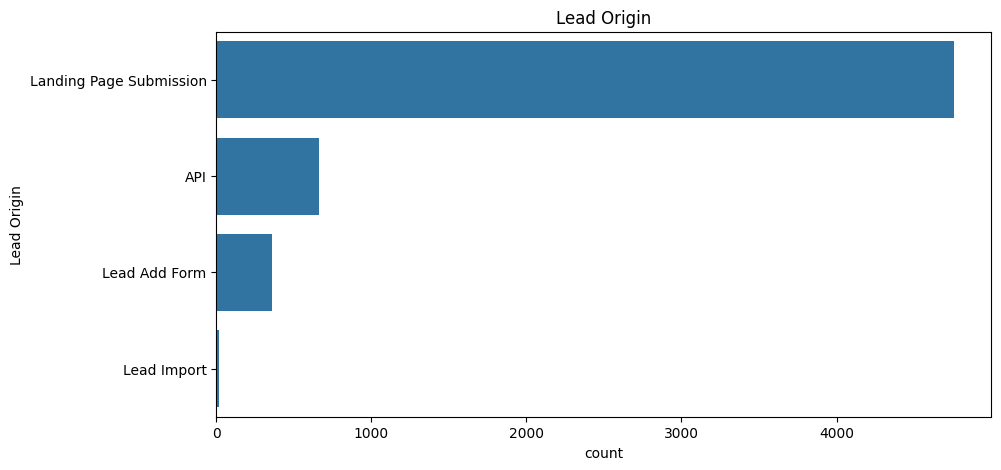

In [71]:
# Lead Origin
plt.figure(figsize = [10,5])
sns.countplot(lead['Lead Origin'])
plt.title('Lead Origin')
plt.show()

The above plot says that majority of the Leads are acquired by Submission by visitors on the page, also these visitors may be anonymous visitors.

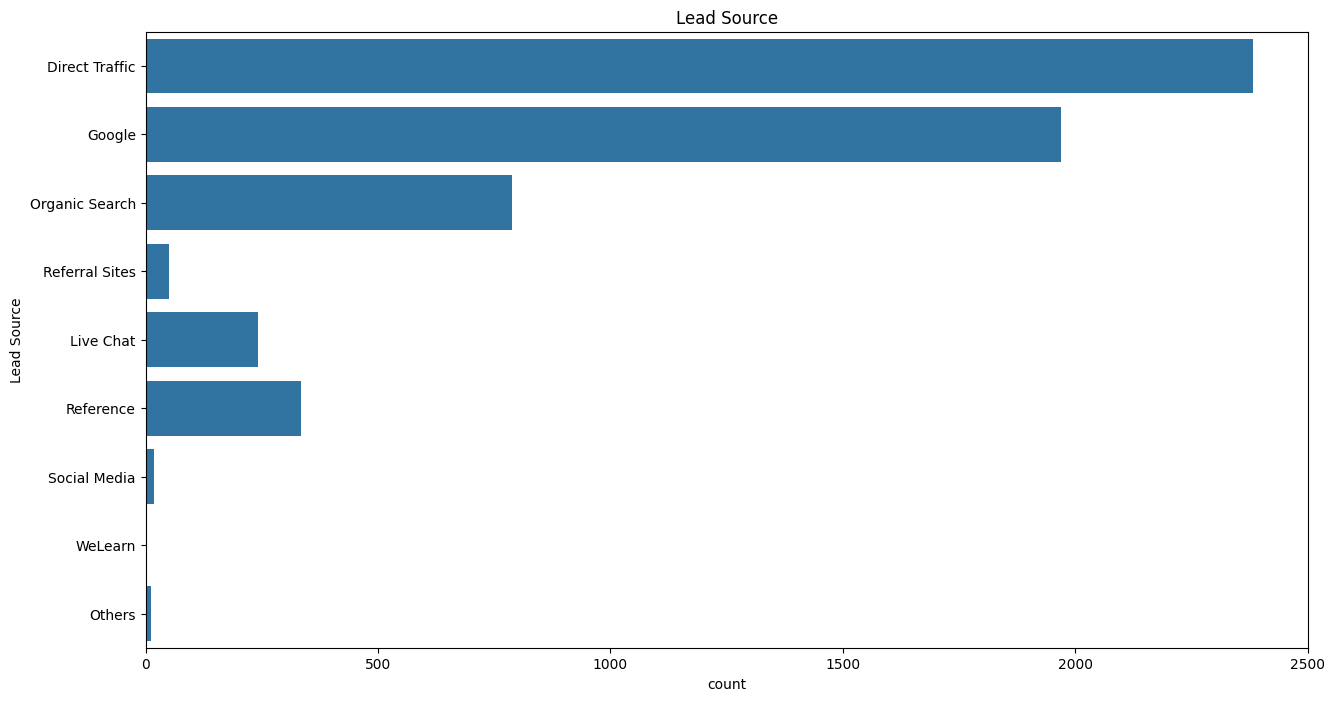

In [72]:
# Lead Source
plt.figure(figsize = [15,8])
sns.countplot(lead['Lead Source'])
plt.title('Lead Source')
plt.show()

Leads from Google aqcuire major portion of the Source and Direct Traffic i.e. a visitor directly arriving on the site proves to be a useful source.

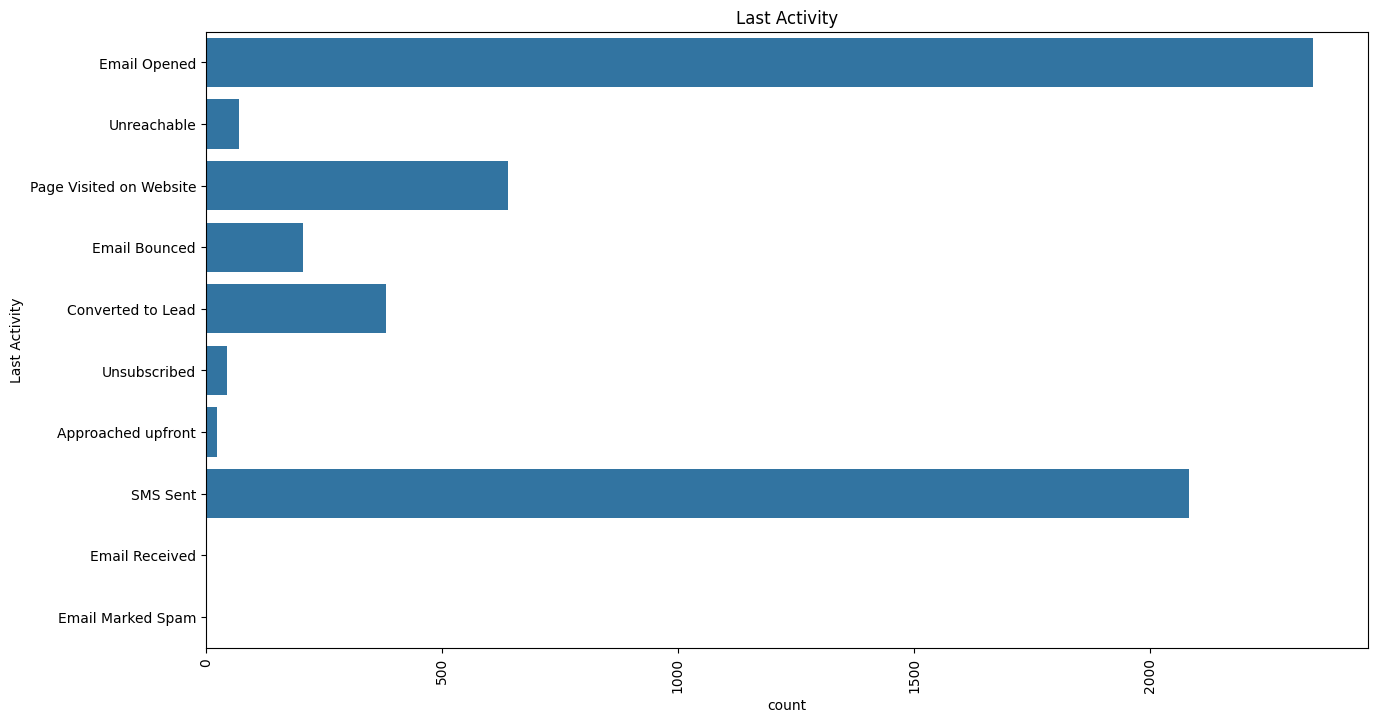

In [73]:
# Last Activity
plt.figure(figsize = [15,8])
sns.countplot(lead['Last Activity'])
plt.title('Last Activity')
plt.xticks(rotation = 90)
plt.show()

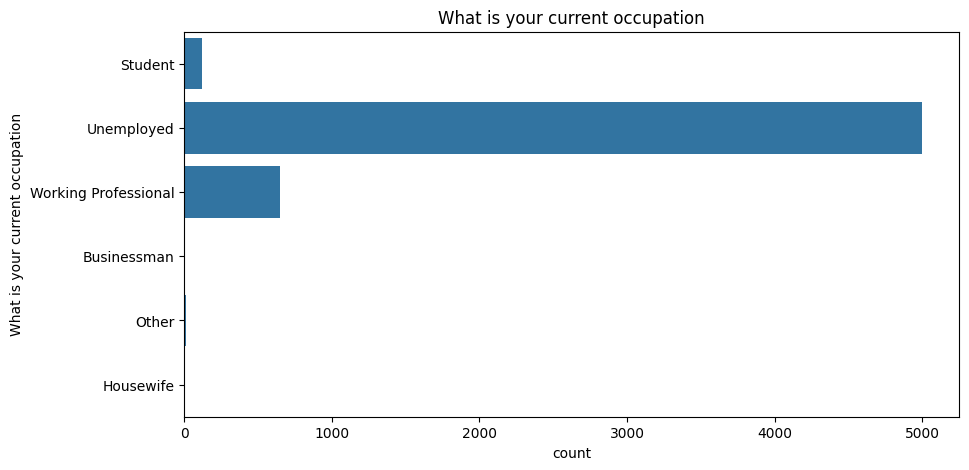

In [74]:
# Current Occupation
plt.figure(figsize = [10,5])
sns.countplot(lead['What is your current occupation'])
plt.title('What is your current occupation')
plt.show()

The Unemployed status of the candidates looks to be main reason for pursuing a Upskilling course, although the Working Professionals are also looking for a better opportunity by taking up these upskilling courses.

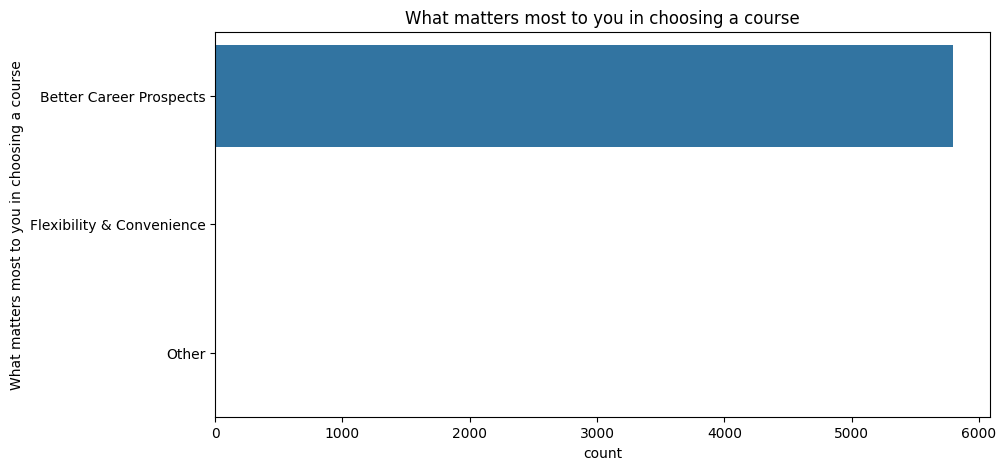

In [75]:
# Reason to Pursue this Online Educational courses
plt.figure(figsize = [10,5])
sns.countplot(lead['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course')
plt.show()

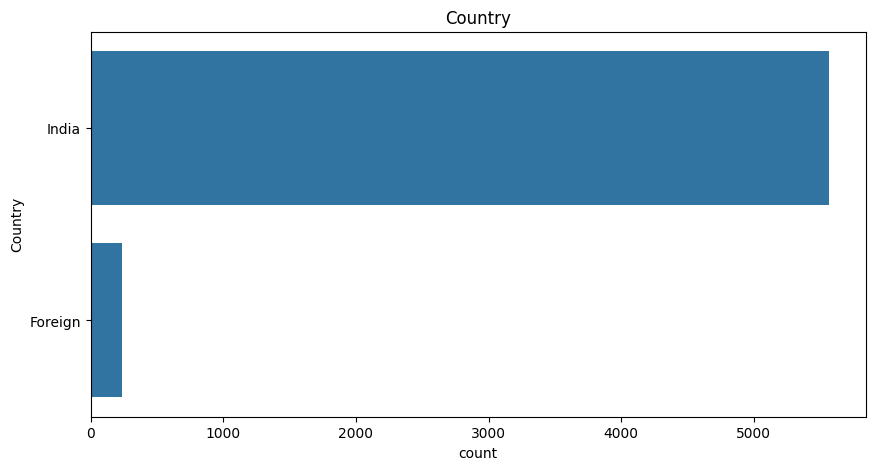

In [76]:
# Country to Which these applicants belong
plt.figure(figsize = [10,5])
sns.countplot(lead['Country'])
plt.title('Country')
plt.show()

As we've clubbed the entries to India and Foreign applicants, candidates from India proves to be majority.

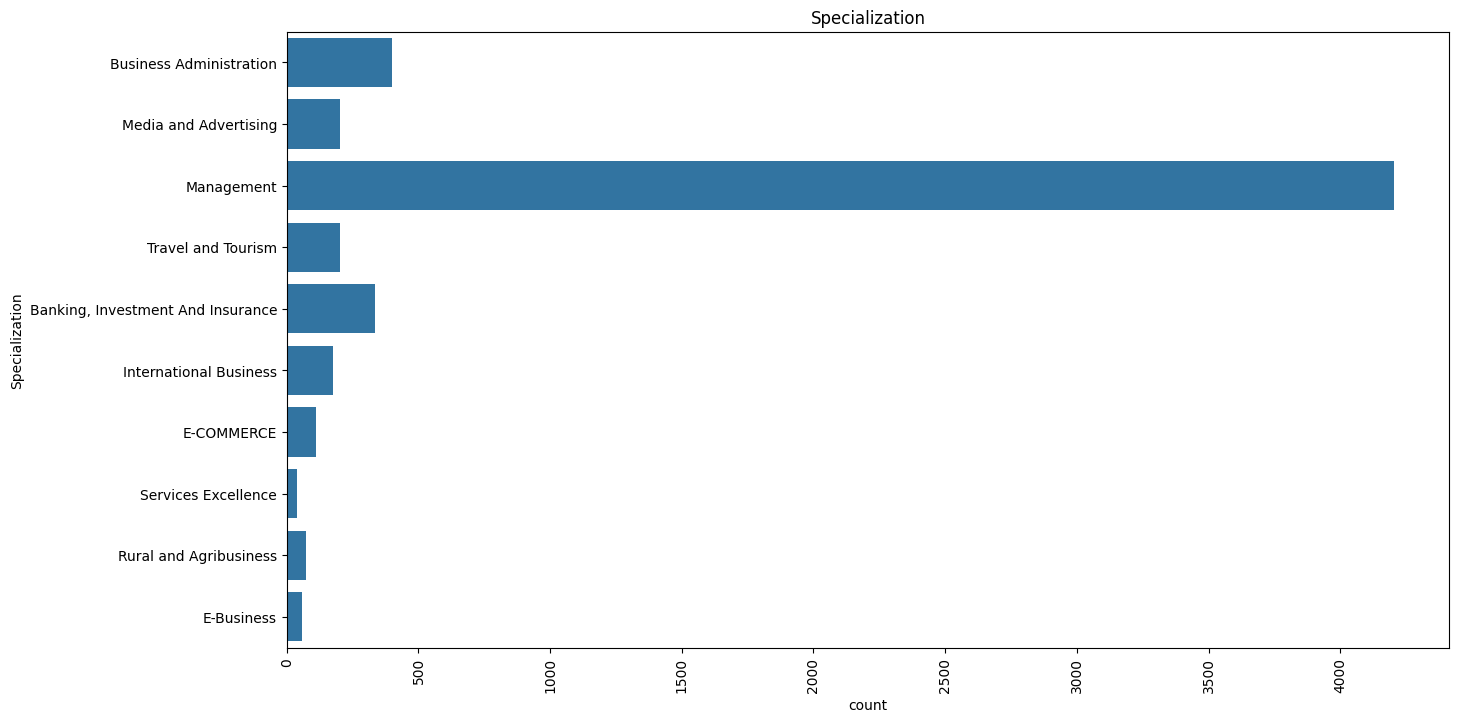

In [77]:
# Specialization
plt.figure(figsize = [15,8])
sns.countplot(lead['Specialization'])
plt.title('Specialization')
plt.xticks(rotation = 90)
plt.show()

Masses are keen in pursuing courses related to Management

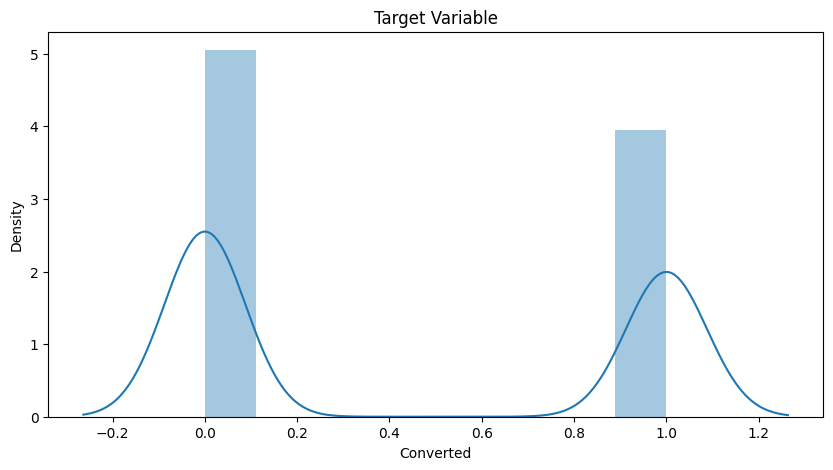

In [225]:
# Converted - Target variable
plt.figure(figsize = [10,5])
sns.distplot(lead.Converted)
plt.title('Target Variable')
plt.show()

In [79]:
# Conversion Rate
print(100*sum(lead.Converted)/len(lead['Converted'].index))

43.8178996378686


As we see both from plot and the calculations there is a Lead Conversion rate of 43.88%

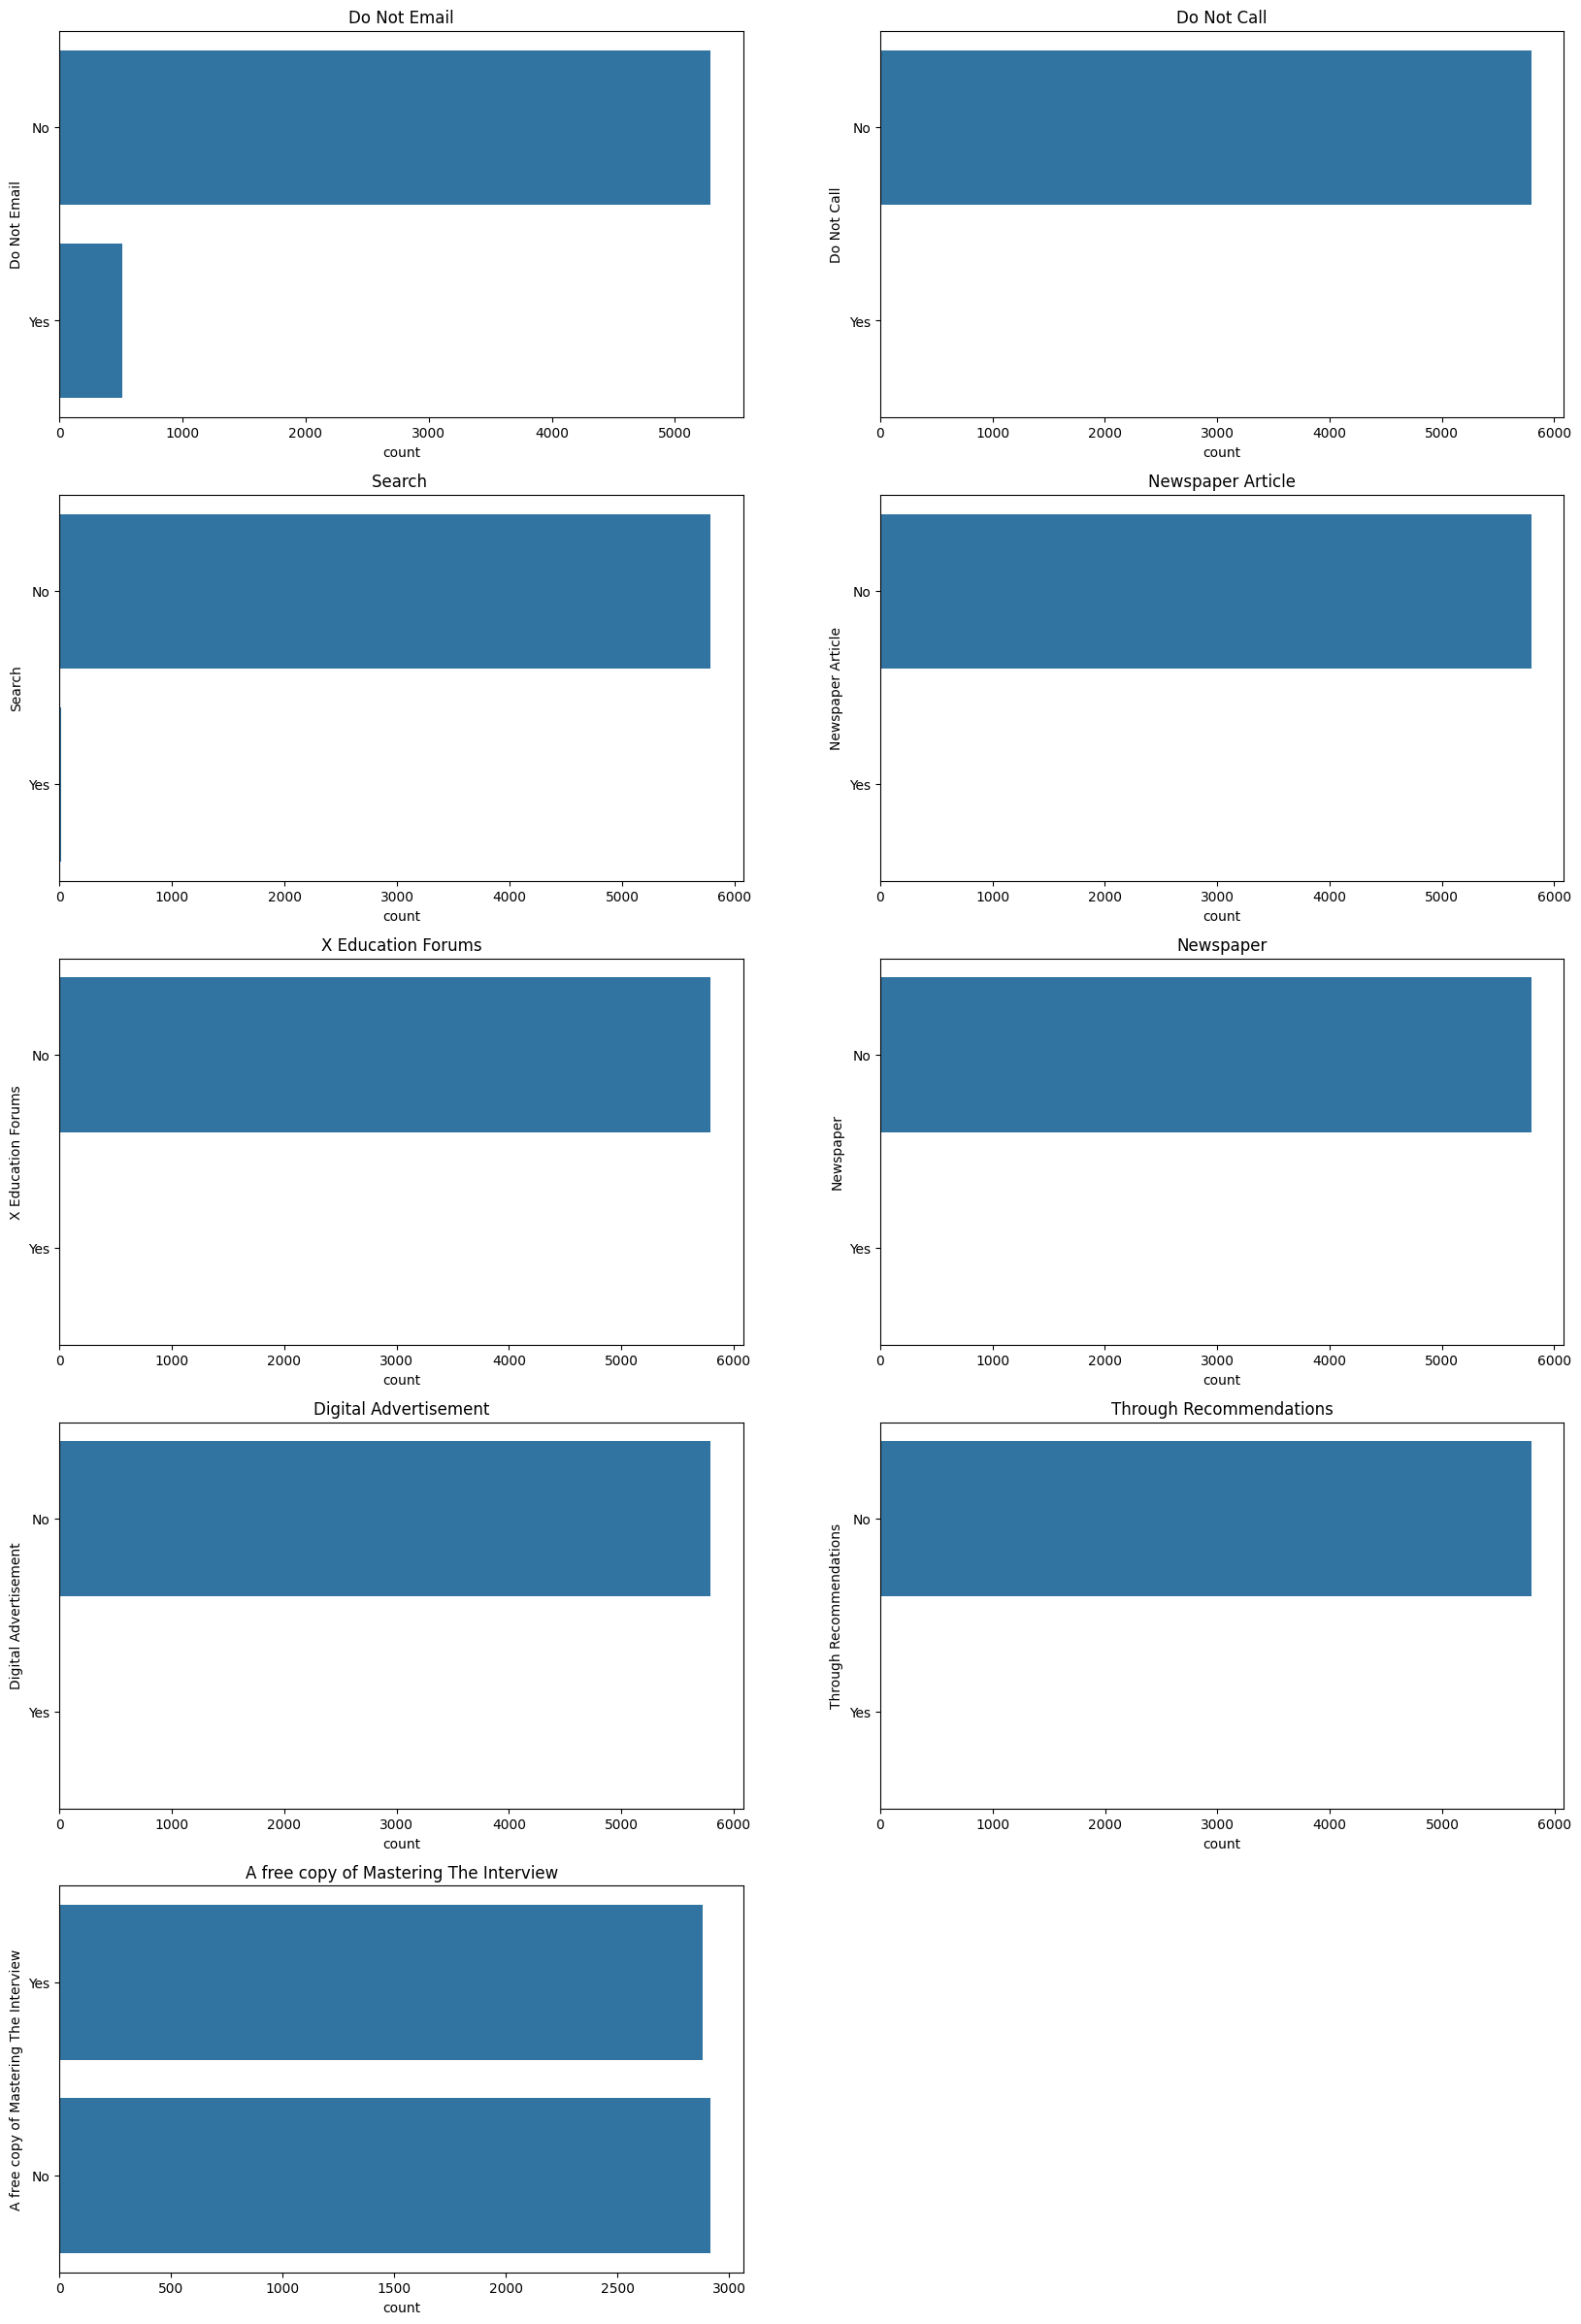

In [80]:
plt.figure(figsize = [20,30])

plt.subplot(5,2,1)
sns.countplot(lead['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(5,2,2)
sns.countplot(lead['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(5,2,3)
sns.countplot(lead['Search'])
plt.title('Search ')

plt.subplot(5,2,4)
sns.countplot(lead['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(5,2,5)
sns.countplot(lead['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(5,2,6)
sns.countplot(lead['Newspaper'])
plt.title('Newspaper')

plt.subplot(5,2,7)
sns.countplot(lead['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(5,2,8)
sns.countplot(lead['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(5,2,9)
sns.countplot(lead['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.show()

These above variables may be refered as miscellenous variables majorly includes the promoting platform for X education.

#### 2. Numerical Variables

In [81]:
num_vars

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

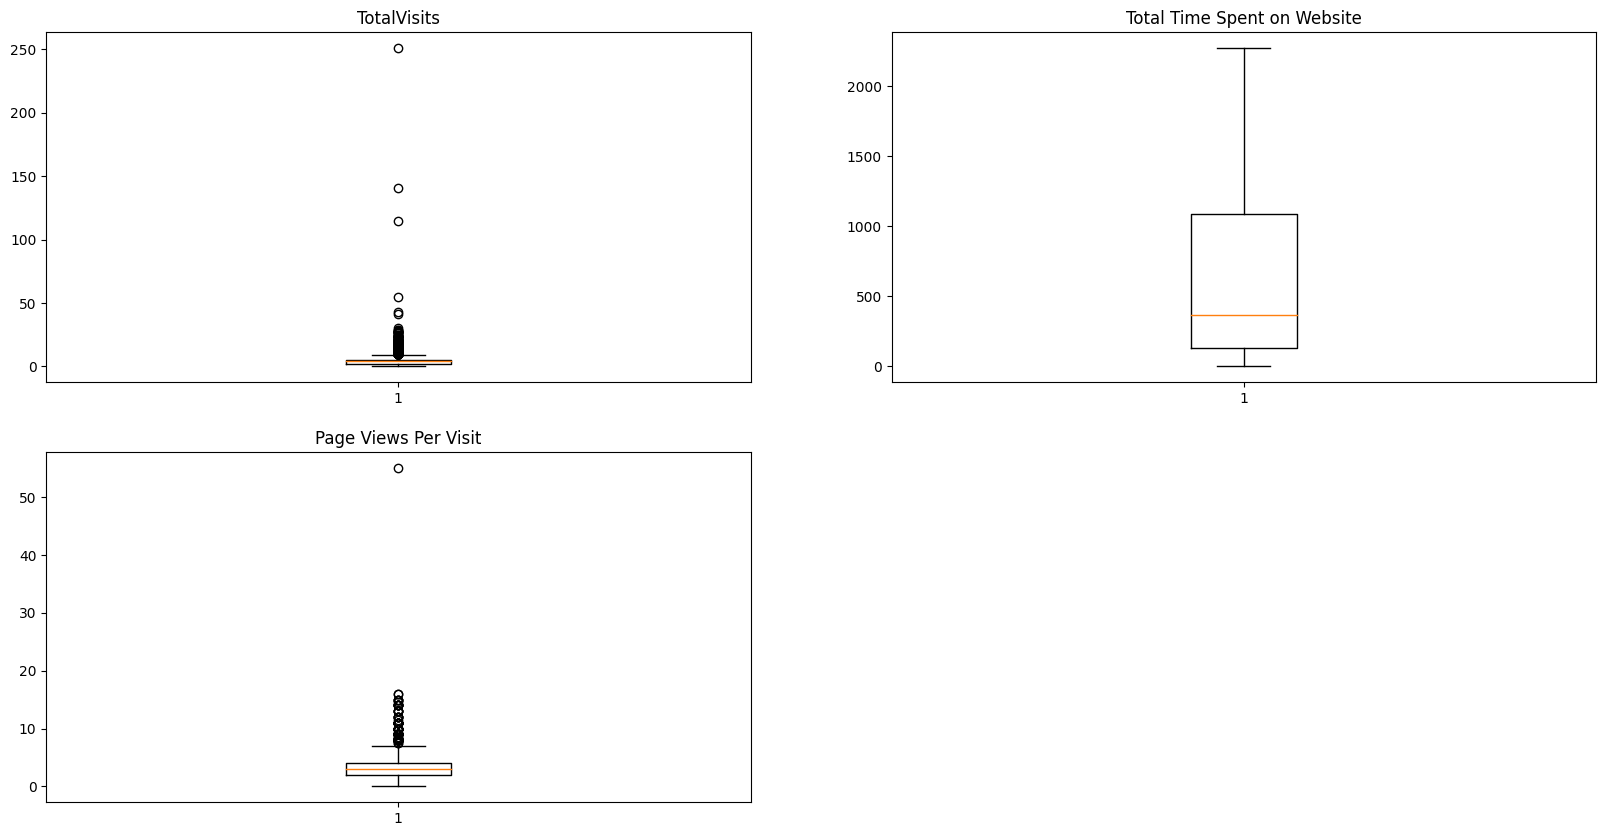

In [82]:
plt.figure(figsize = [20,10])

plt.subplot(2,2,1)
plt.boxplot(lead['TotalVisits'])
plt.title('TotalVisits')

plt.subplot(2,2,2)
plt.boxplot(lead['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.boxplot(lead['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.show()

We see there are outliers in Page Views Per Visit and TotalVisits, we cap them

In [83]:
#  Outliers Treatment for TotalVisits
Q1 = lead['TotalVisits'].quantile(0.05)
Q3 = lead['TotalVisits'].quantile(0.95)
IOR = Q3-Q1
lead = lead[(lead['TotalVisits']>= Q1-1.5*IOR) & (lead['TotalVisits']<=Q3+1.5*IOR)]

# Outliers Treatment for Page Views Per Visit
Q1 = lead['Page Views Per Visit'].quantile(0.05)
Q3 = lead['Page Views Per Visit'].quantile(0.95)
IOR = Q3-Q1
lead = lead[(lead['Page Views Per Visit']>= Q1-1.5*IOR) & (lead['Page Views Per Visit']<=Q3+1.5*IOR)]

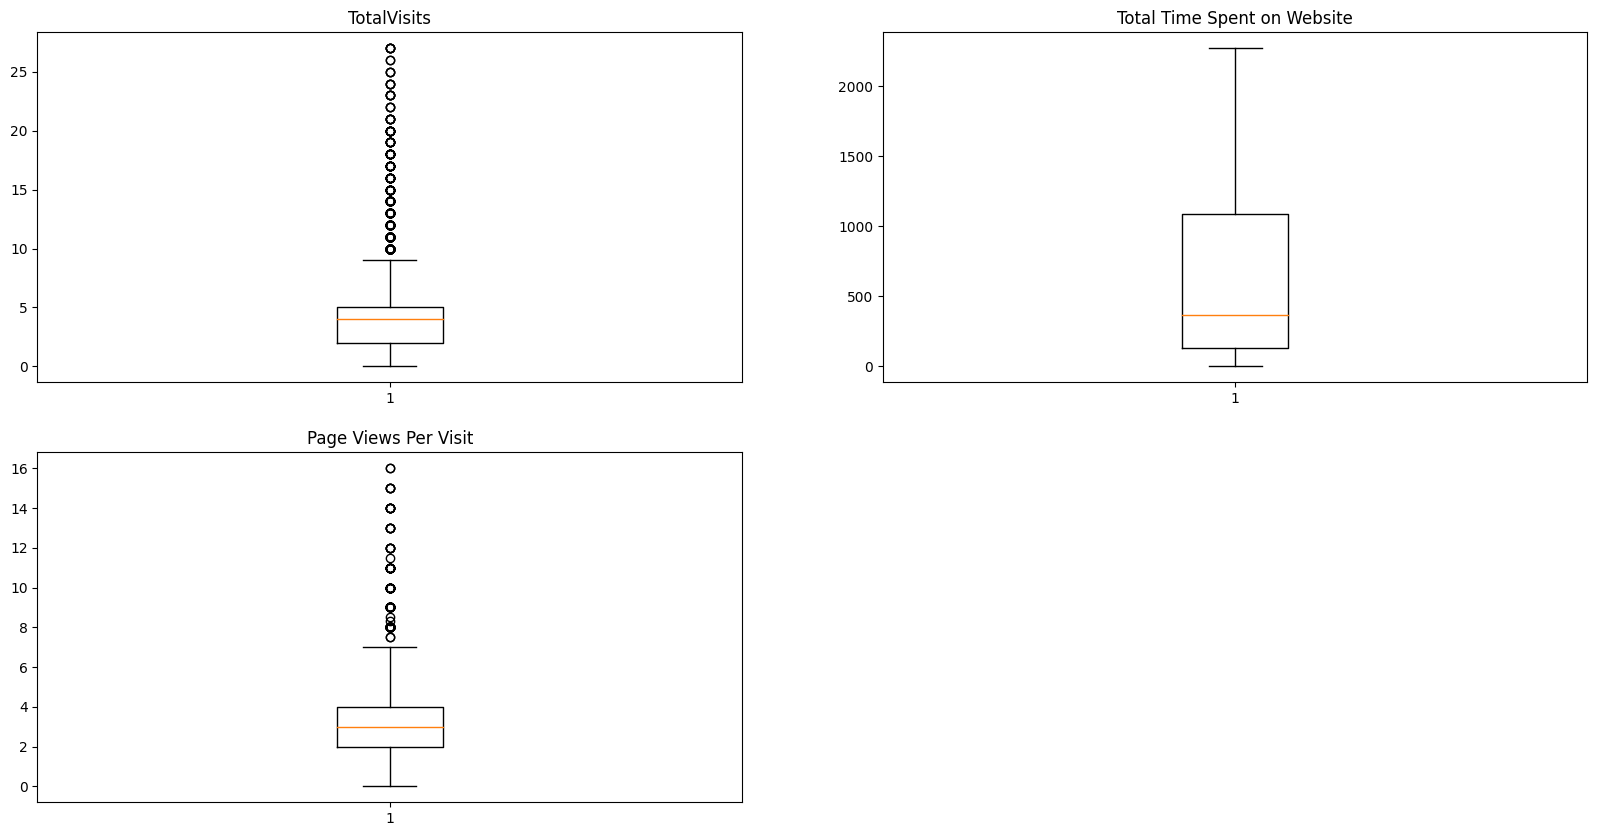

In [84]:
plt.figure(figsize = [20,10])

plt.subplot(2,2,1)
plt.boxplot(lead['TotalVisits'])
plt.title('TotalVisits')

plt.subplot(2,2,2)
plt.boxplot(lead['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.boxplot(lead['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.show()

In [85]:
lead.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  5788.000000  5788.000000                  5788.000000   
mean      0.438839     4.250000                   604.583967   
std       0.496288     3.388635                   555.354852   
min       0.000000     0.000000                     0.000000   
25%       0.000000     2.000000                   131.000000   
50%       0.000000     4.000000                   367.000000   
75%       1.000000     5.000000                  1087.000000   
max       1.000000    27.000000                  2272.000000   

       Page Views Per Visit  
count           5788.000000  
mean               3.010282  
std                1.983376  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                4.000000  
max               16.000000

### 3.2 Bivariate Analysis

#### 1. Relating Categorical varaibles with Target Variable - Converted

In [86]:
cat_vars

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [87]:
lead[cat_vars].nunique()

Lead Origin                                       4
Lead Source                                       9
Do Not Email                                      2
Do Not Call                                       2
Last Activity                                    10
Country                                           2
Specialization                                   10
What is your current occupation                   6
What matters most to you in choosing a course     3
Search                                            2
Newspaper Article                                 2
X Education Forums                                2
Newspaper                                         2
Digital Advertisement                             2
Through Recommendations                           2
A free copy of Mastering The Interview            2
dtype: int64

We'll again follow the same steps of first looking into variables with more than 2 categories

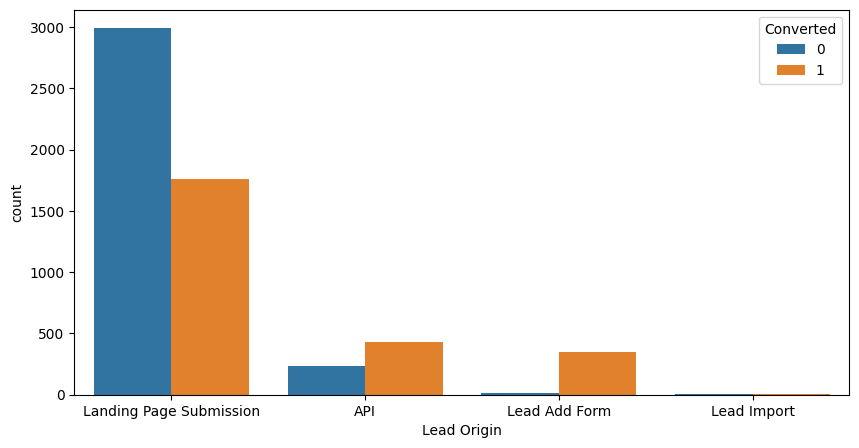

In [91]:
# Lead Origin
plt.figure(figsize = [10,5])
sns.countplot(data = lead,x = 'Lead Origin', hue = lead['Converted'])
plt.show()

Even though the Leads are contibuted from Landing Page but the conversion is better for Lead Add Form.

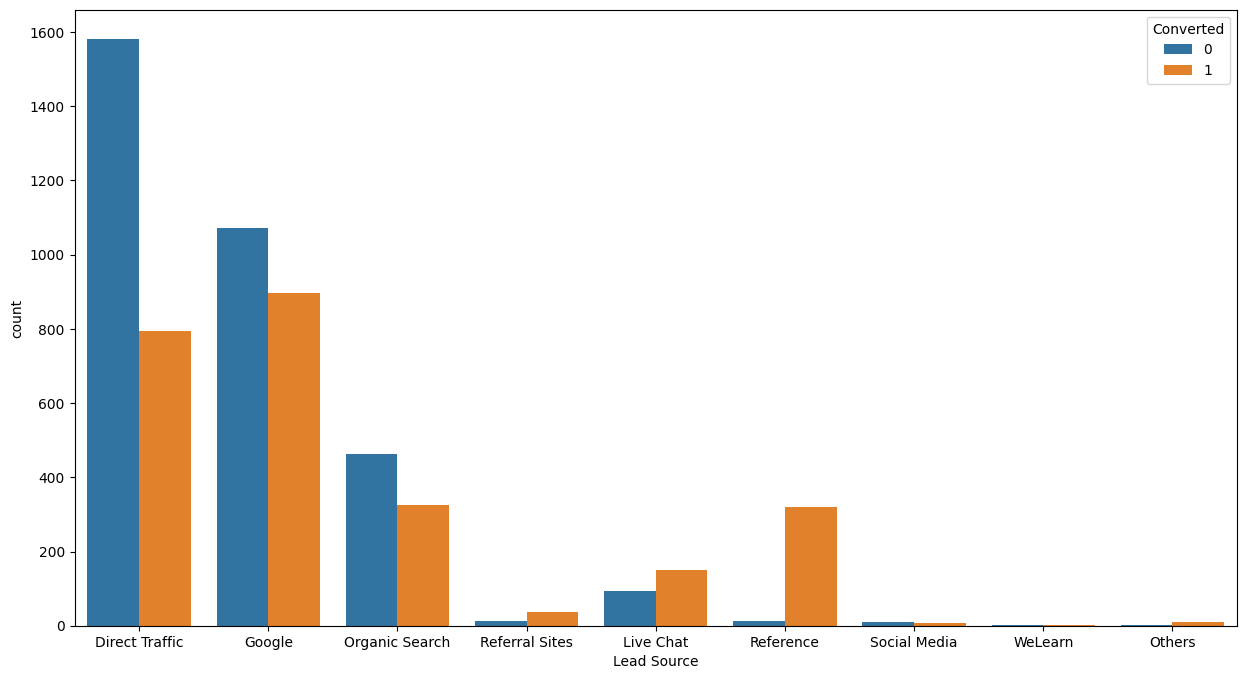

In [92]:
# Lead Source
plt.figure(figsize = [15,8])
sns.countplot(data = lead,x ='Lead Source', hue= lead['Converted'])
plt.show()

We observe through references,Live chat and referral sites a customer is more likely to get converted to a Lead.

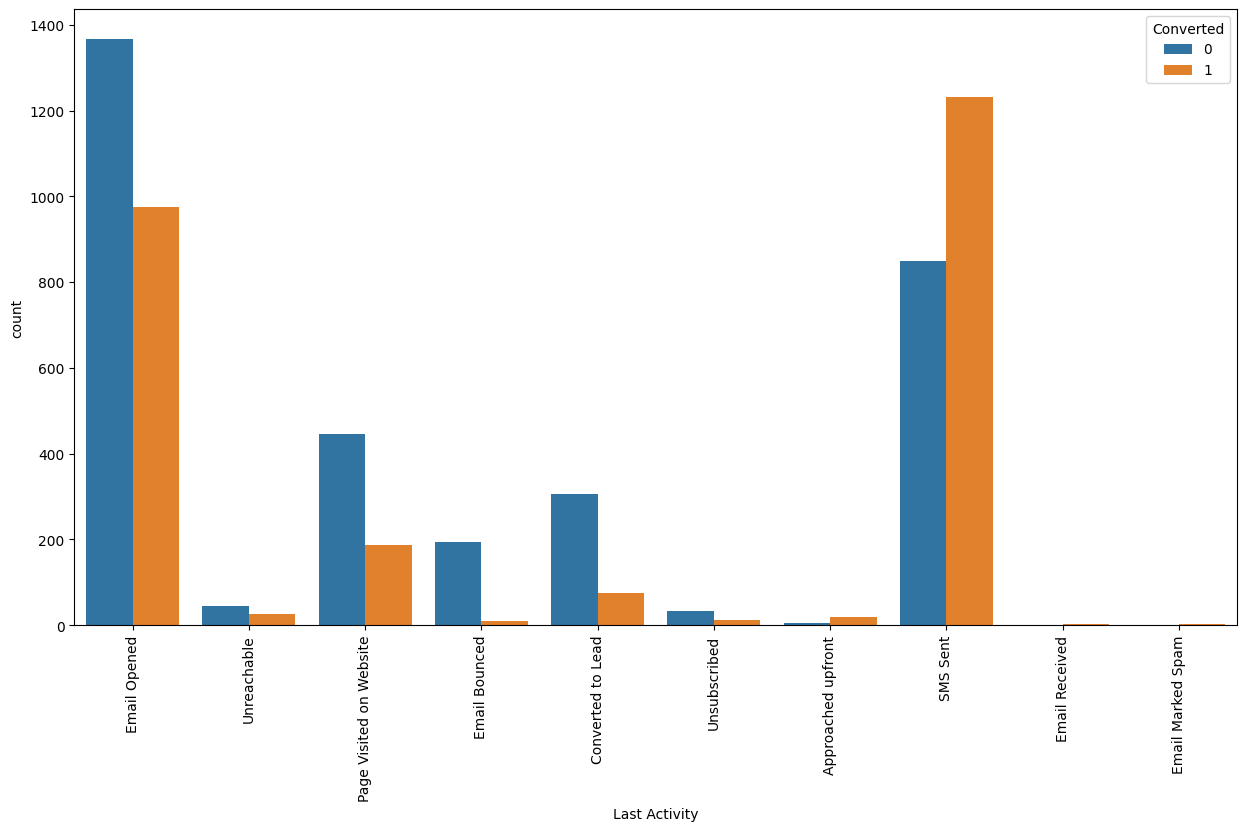

In [93]:
# Last Activity
plt.figure(figsize = [15,8])
sns.countplot(data = lead,x = 'Last Activity', hue= lead['Converted'])
plt.xticks(rotation = 90)
plt.show()

In Last Activity the lead conversion is best for those with category SMS sent.

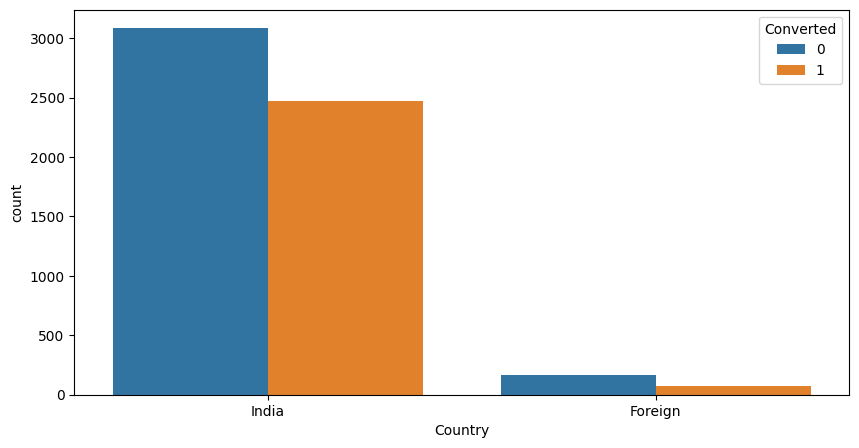

In [94]:
# Country
plt.figure(figsize = [10,5])
sns.countplot(data = lead,x = lead['Country'], hue= lead['Converted'])
plt.show()

In [ ]:
round(100*lead.groupby('Country')['Converted'].sum()/lead.Converted.count(),2)

Out of 43.88% only 0.9% are Foreign Nationals and rest major portion is occupied by Candidtes from India.

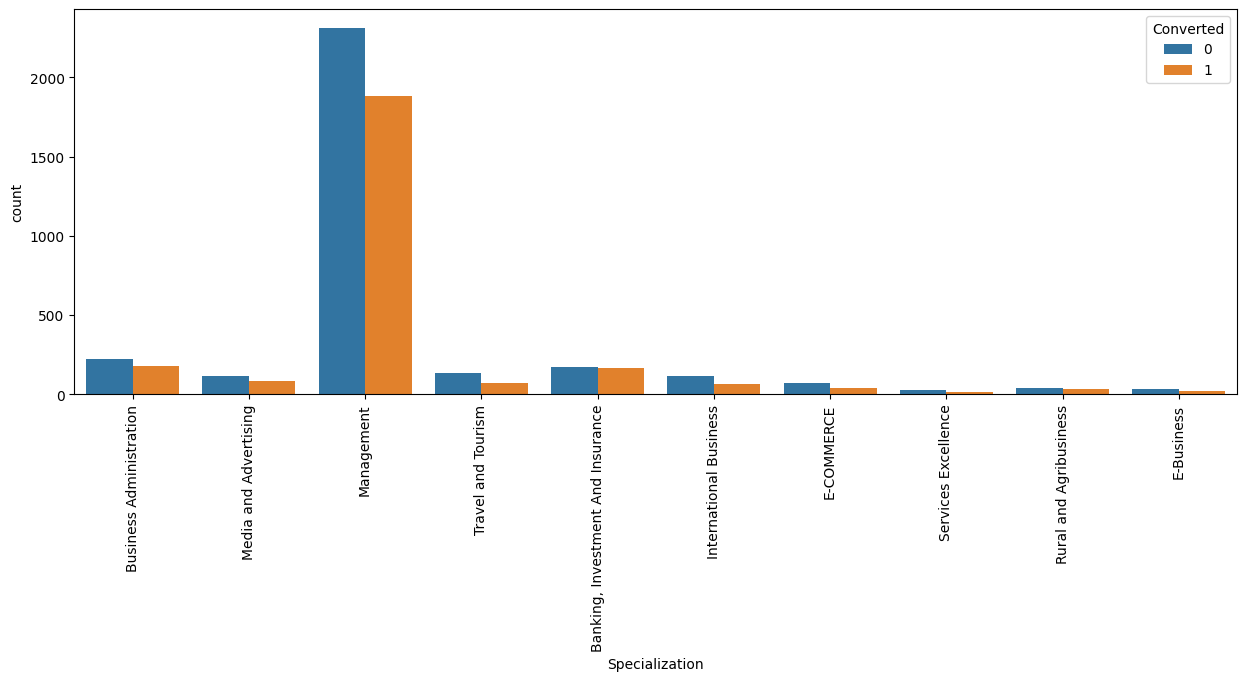

In [95]:
# Specialization
plt.figure(figsize = [15,5])
sns.countplot(data = lead,x = lead['Specialization'], hue= lead['Converted'])
plt.xticks(rotation = 90)
plt.show()

In [97]:
round(100*lead.groupby('Specialization')['Converted'].sum()/lead.Converted.count(),2)

Specialization
Banking, Investment And Insurance     2.83
Business Administration               3.02
E-Business                            0.36
E-COMMERCE                            0.67
International Business                1.07
Management                           32.52
Media and Advertising                 1.45
Rural and Agribusiness                0.54
Services Excellence                   0.19
Travel and Tourism                    1.23
Name: Converted, dtype: float64

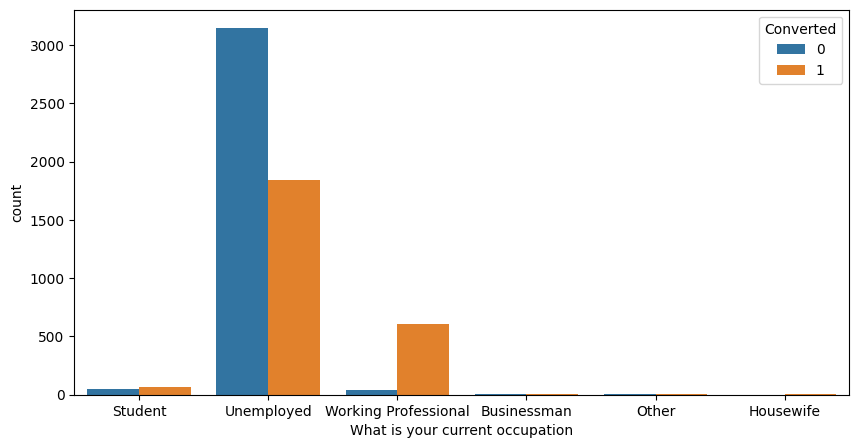

In [96]:
# What is your current occupation
plt.figure(figsize = [10,5])
sns.countplot(data = lead,x = lead['What is your current occupation'], hue= lead['Converted'])
#plt.xticks(rotation = 90)
plt.show()

Working Proffessional have better chances of Converting to a Lead also Students are more likely to get converted in a Lead.

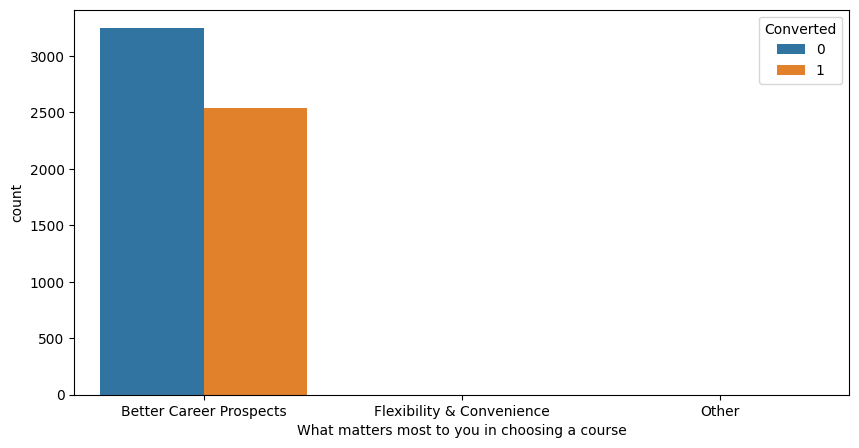

In [98]:
# What matters most to you in choosing a course
plt.figure(figsize = [10,5])
sns.countplot(data = lead,x = lead['What matters most to you in choosing a course'], hue= lead['Converted'])
plt.show()

In [99]:
round(100* lead.groupby('What matters most to you in choosing a course')['Converted'].sum()/lead.Converted.count(),2)

What matters most to you in choosing a course
Better Career Prospects      43.87
Flexibility & Convenience     0.02
Other                         0.00
Name: Converted, dtype: float64

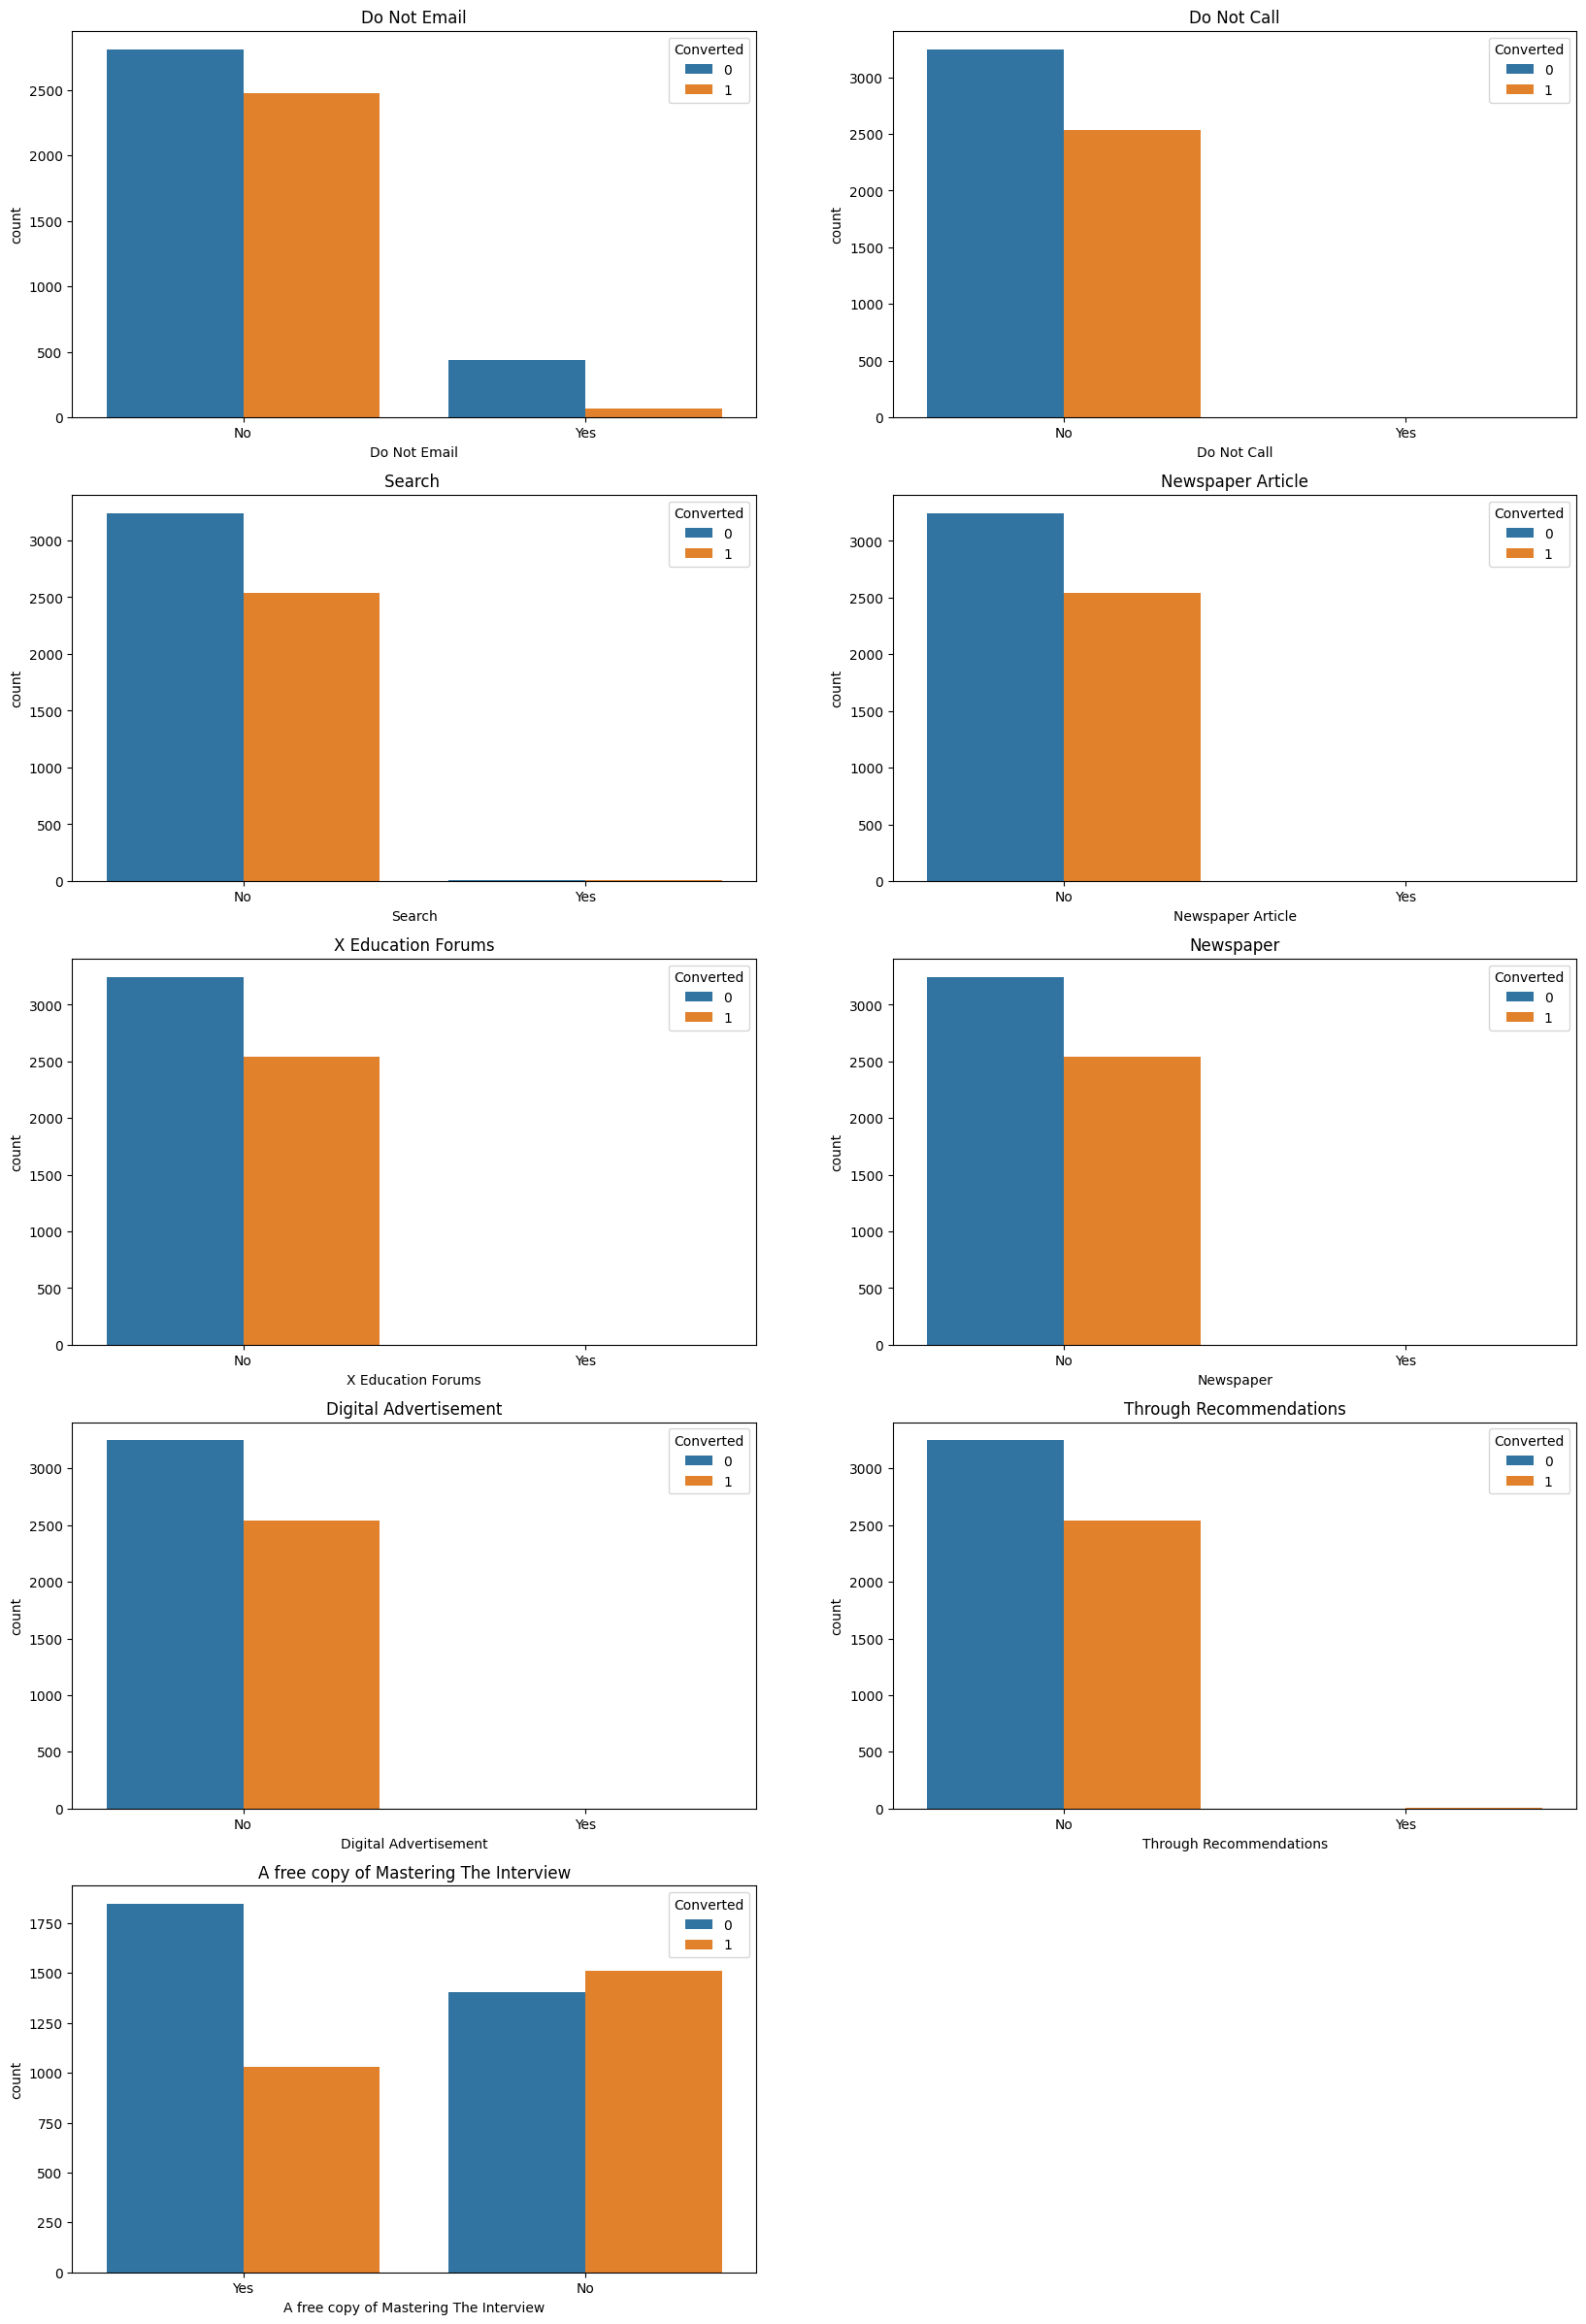

In [101]:
plt.figure(figsize = [20,30])

plt.subplot(5,2,1)
sns.countplot(data = lead,x = lead['Do Not Email'],hue = lead.Converted)
plt.title('Do Not Email')

plt.subplot(5,2,2)
sns.countplot(data = lead,x = lead['Do Not Call'],hue = lead.Converted)
plt.title('Do Not Call')

plt.subplot(5,2,3)
sns.countplot(data = lead,x = lead['Search'],hue = lead.Converted)
plt.title('Search ')

plt.subplot(5,2,4)
sns.countplot(data = lead,x = lead['Newspaper Article'],hue = lead.Converted)
plt.title('Newspaper Article')

plt.subplot(5,2,5)
sns.countplot(data = lead,x = lead['X Education Forums'],hue = lead.Converted)
plt.title('X Education Forums')

plt.subplot(5,2,6)
sns.countplot(data = lead,x = lead['Newspaper'],hue = lead.Converted)
plt.title('Newspaper')

plt.subplot(5,2,7)
sns.countplot(data = lead,x = lead['Digital Advertisement'],hue = lead.Converted)
plt.title('Digital Advertisement')

plt.subplot(5,2,8)
sns.countplot(data = lead,x = lead['Through Recommendations'],hue = lead.Converted)
plt.title('Through Recommendations')

plt.subplot(5,2,9)
sns.countplot(data = lead,x = lead['A free copy of Mastering The Interview'],hue = lead.Converted)
plt.title('A free copy of Mastering The Interview')

plt.show()

#### 2. Relating Numerical Variables with Target Variable - Converted

In [102]:
num_vars  # Coverted is a Categorical Variable

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [103]:
num = lead[num_vars].corr()
num

Converted  TotalVisits  \
Converted                     1.000000    -0.011405   
TotalVisits                  -0.011405     1.000000   
Total Time Spent on Website   0.359689     0.172614   
Page Views Per Visit         -0.097208     0.575285   

                             Total Time Spent on Website  Page Views Per Visit  
Converted                                       0.359689             -0.097208  
TotalVisits                                     0.172614              0.575285  
Total Time Spent on Website                     1.000000              0.164402  
Page Views Per Visit                            0.164402              1.000000

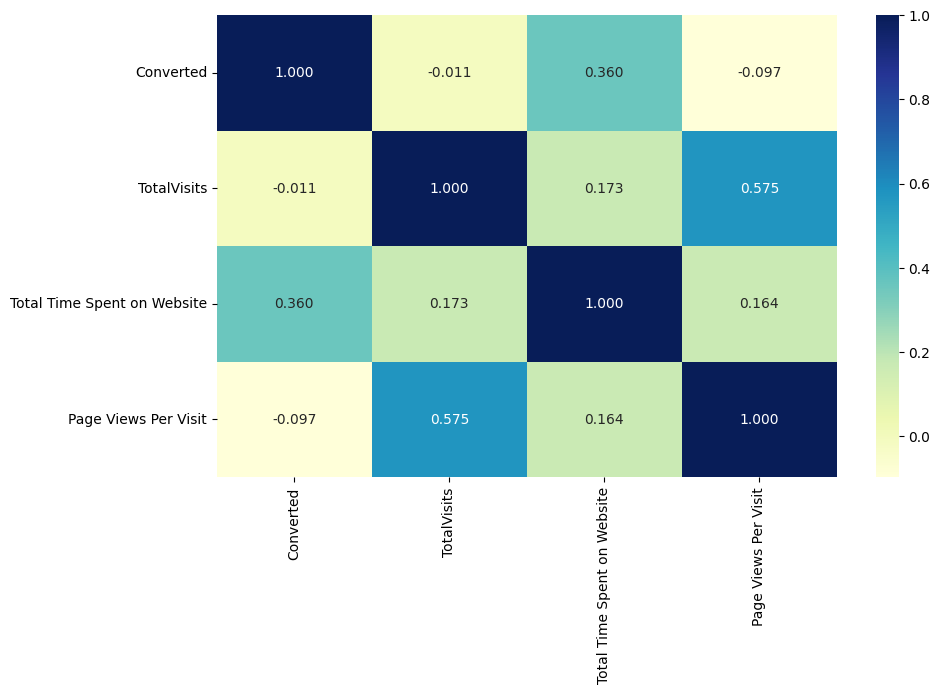

In [104]:
plt.figure(figsize = [10,6])
sns.heatmap(num,annot = True, fmt = '0.3f',cmap = 'YlGnBu')
plt.show()

In [105]:
lead[num_vars].describe([0.25,0.5,0.75,0.9,0.99]).transpose()

count        mean         std  min    25%  \
Converted                    5788.0    0.438839    0.496288  0.0    0.0   
TotalVisits                  5788.0    4.250000    3.388635  0.0    2.0   
Total Time Spent on Website  5788.0  604.583967  555.354852  0.0  131.0   
Page Views Per Visit         5788.0    3.010282    1.983376  0.0    2.0   

                               50%     75%     90%      99%     max  
Converted                      0.0     1.0     1.0     1.00     1.0  
TotalVisits                    4.0     5.0     8.0    18.00    27.0  
Total Time Spent on Website  367.0  1087.0  1449.0  1866.65  2272.0  
Page Views Per Visit           3.0     4.0     5.0    10.00    16.0

## 4. Dummy Variables

In [106]:
cat_vars

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [107]:
# Creating Dummy variables for above Categorical variables
dummy = pd.get_dummies(lead[cat_vars],drop_first = True)
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
2                                    1                          0   
3                                    1                          0   
6                                    1                          0   
8                                    1                          0   
9                                    0                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Live Chat  \
2                        0                   0                      0   
3                        0                   0                      0   
6                        0                   1                      0   
8                        0                   0                      0   
9                        0                   1                      0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
2                           0                   0                      0   
3                           0                   0                      0   
6                           0                   0                      0   
8                           0                   0                      0   
9                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
2                           0                         0                    0   
3                           0                         0                    0   
6                           0                         0                    0   
8                           0                         0                    0   
9                           0                         0                    0   

   Do Not Email_Yes  Do Not Call_Yes  Last Activity_Converted to Lead  \
2                 0                0                                0   
3                 0                0                                0   
6                 0                0                                0   
8                 0                0                                0   
9                 0                0                                0   

   Last Activity_Email Bounced  Last Activity_Email Marked Spam  \
2                            0                                0   
3                            0                                0   
6                            0                                0   
8                            0                                0   
9                            0                                0   

   Last Activity_Email Opened  Last Activity_Email Received  \
2                           1                             0   
3                           0                             0   
6                           1                             0   
8                           1                             0   
9                           1                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
2                                      0                       0   
3                                      0                       0   
6                                      0                       0   
8                                      0                       0   
9                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  Country_India  \
2                          0                           0              1   
3                          1                           0              1   
6                          0                           0              1   
8                          0                           0              1   
9                          0                           0              1   

   Specialization_Business Administration  Specialization_E-Business  \
2                                       1                 

In [108]:
# Merging the dummy variables to main Data Frame and also dropping the Categorical variables
lead_final = lead.drop(cat_vars,axis = 1)
lead_final = pd.concat([lead_final,dummy],axis = 1)
lead_final.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
6          1          2.0                         1640                   2.0   
8          0          2.0                           71                   2.0   
9          0          4.0                           58                   4.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
2                                    1                          0   
3                                    1                          0   
6                                    1                          0   
8                                    1                          0   
9                                    0                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Live Chat  \
2                        0                   0                      0   
3                        0                   0                      0   
6                        0                   1                      0   
8                        0                   0                      0   
9                        0                   1                      0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
2                           0                   0                      0   
3                           0                   0                      0   
6                           0                   0                      0   
8                           0                   0                      0   
9                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
2                           0                         0                    0   
3                           0                         0                    0   
6                           0                         0                    0   
8                           0                         0                    0   
9                           0                         0                    0   

   Do Not Email_Yes  Do Not Call_Yes  Last Activity_Converted to Lead  \
2                 0                0                                0   
3                 0                0                                0   
6                 0                0                                0   
8                 0                0                                0   
9                 0                0                                0   

   Last Activity_Email Bounced  Last Activity_Email Marked Spam  \
2                            0                                0   
3                            0                                0   
6                            0                                0   
8                            0                                0   
9                            0                                0   

   Last Activity_Email Opened  Last Activity_Email Received  \
2                           1                             0   
3                           0                             0   
6                           1                             0   
8                           1                             0   
9                           1                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
2                                      0                       0   
3                                      0                       0   
6                                      0                       0   
8                                      0                       0   
9                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  Country_India  \
2                        

In [109]:
lead_final.shape # New dimensions

(5788, 50)

## 5 .Train-Test Split

In [110]:
# importing required libraries
from sklearn.model_selection import train_test_split

In [111]:
y = lead_final['Converted']
X = lead_final.drop('Converted',axis = 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
6          2.0                         1640                   2.0   
8          2.0                           71                   2.0   
9          4.0                           58                   4.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
2                                    1                          0   
3                                    1                          0   
6                                    1                          0   
8                                    1                          0   
9                                    0                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Live Chat  \
2                        0                   0                      0   
3                        0                   0                      0   
6                        0                   1                      0   
8                        0                   0                      0   
9                        0                   1                      0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
2                           0                   0                      0   
3                           0                   0                      0   
6                           0                   0                      0   
8                           0                   0                      0   
9                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
2                           0                         0                    0   
3                           0                         0                    0   
6                           0                         0                    0   
8                           0                         0                    0   
9                           0                         0                    0   

   Do Not Email_Yes  Do Not Call_Yes  Last Activity_Converted to Lead  \
2                 0                0                                0   
3                 0                0                                0   
6                 0                0                                0   
8                 0                0                                0   
9                 0                0                                0   

   Last Activity_Email Bounced  Last Activity_Email Marked Spam  \
2                            0                                0   
3                            0                                0   
6                            0                                0   
8                            0                                0   
9                            0                                0   

   Last Activity_Email Opened  Last Activity_Email Received  \
2                           1                             0   
3                           0                             0   
6                           1                             0   
8                           1                             0   
9                           1                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
2                                      0                       0   
3                                      0                       0   
6                                      0                       0   
8                                      0                       0   
9                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  Country_India  \
2                          0                           0              1   
3               

In [112]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)

In [113]:
X_train.shape

(4051, 49)

In [114]:
X_test.shape

(1737, 49)

## 6. Scaling features

In [115]:
# importing required libraries
from sklearn.preprocessing import MinMaxScaler

In [116]:
num_vars = num_vars.drop('Converted', 1)
num_vars

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [117]:
# Scaling the numerical variables
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train[num_vars].head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
1016     0.111111                     0.144366              0.187500
1725     0.074074                     0.033451              0.125000
48       0.222222                     0.539173              0.375000
7909     0.481481                     0.587148              0.406250
6045     0.296296                     0.042254              0.166875

In [118]:
X_train.corr()

TotalVisits  \
TotalVisits                                            1.000000   
Total Time Spent on Website                            0.170229   
Page Views Per Visit                                   0.566331   
Lead Origin_Landing Page Submission                    0.223043   
Lead Origin_Lead Add Form                             -0.291912   
Lead Origin_Lead Import                               -0.049708   
Lead Source_Google                                     0.118883   
Lead Source_Live Chat                                 -0.148188   
Lead Source_Organic Search                             0.252326   
Lead Source_Others                                    -0.015837   
Lead Source_Reference                                 -0.283357   
Lead Source_Referral Sites                             0.010122   
Lead Source_Social Media                              -0.048623   
Lead Source_WeLearn                                   -0.014411   
Do Not Email_Yes                                      -0.019545   
Do Not Call_Yes                                       -0.019377   
Last Activity_Converted to Lead                       -0.130428   
Last Activity_Email Bounced                           -0.083561   
Last Activity_Email Marked Spam                       -0.019377   
Last Activity_Email Opened                             0.029289   
Last Activity_Email Received                           0.003594   
Last Activity_Page Visited on Website                  0.180303   
Last Activity_SMS Sent                                -0.050971   
Last Activity_Unreachable                             -0.000206   
Last Activity_Unsubscribed                             0.001856   
Country_India                                          0.022103   
Specialization_Business Administration                 0.017538   
Specialization_E-Business                              0.017001   
Specialization_E-COMMERCE                              0.010556   
Specialization_International Business                  0.014815   
Specialization_Management                             -0.090560   
Specialization_Media and Advertising                   0.033743   
Specialization_Rural and Agribusiness                  0.024914   
Specialization_Services Excellence                    -0.001125   
Specialization_Travel and Tourism                      0.075559   
What is your current occupation_Housewife             -0.030452   
What is your current occupation_Other                  0.049652   
What is your current occupation_Student               -0.044924   
What is your current occupation_Unemployed             0.099879   
What is your current occupation_Working Profess...    -0.094685   
What matters most to you in choosing a course_F...    -0.019377   
What matters most to you in choosing a course_O...    -0.014783   
Search_Yes                                             0.069235   
Newspaper Article_Yes                                  0.072507   
X Education Forums_Yes                                 0.072507   
Newspaper_Yes                                          0.026565   
Digital Advertisement_Yes                              0.047320   
Through Recommendations_Yes                            0.055448   
A free copy of Mastering The Interview_Yes             0.130628   

                                                    Total Time Spent on Website  \
TotalVisits                                                            0.170229   
Total Time Spent on Website                                            1.000000   
Page Views Per Visit                                                   0.163195   
Lead Origin_Landing Page Submission                                    0.134839   
Lead Origin_Lead Add Form                                             -0.225786   
Lead Origin_Lead Import                                               -0.053471   
Lead Source_Google                                                     0.129592   
Lead Source_Live Chat                

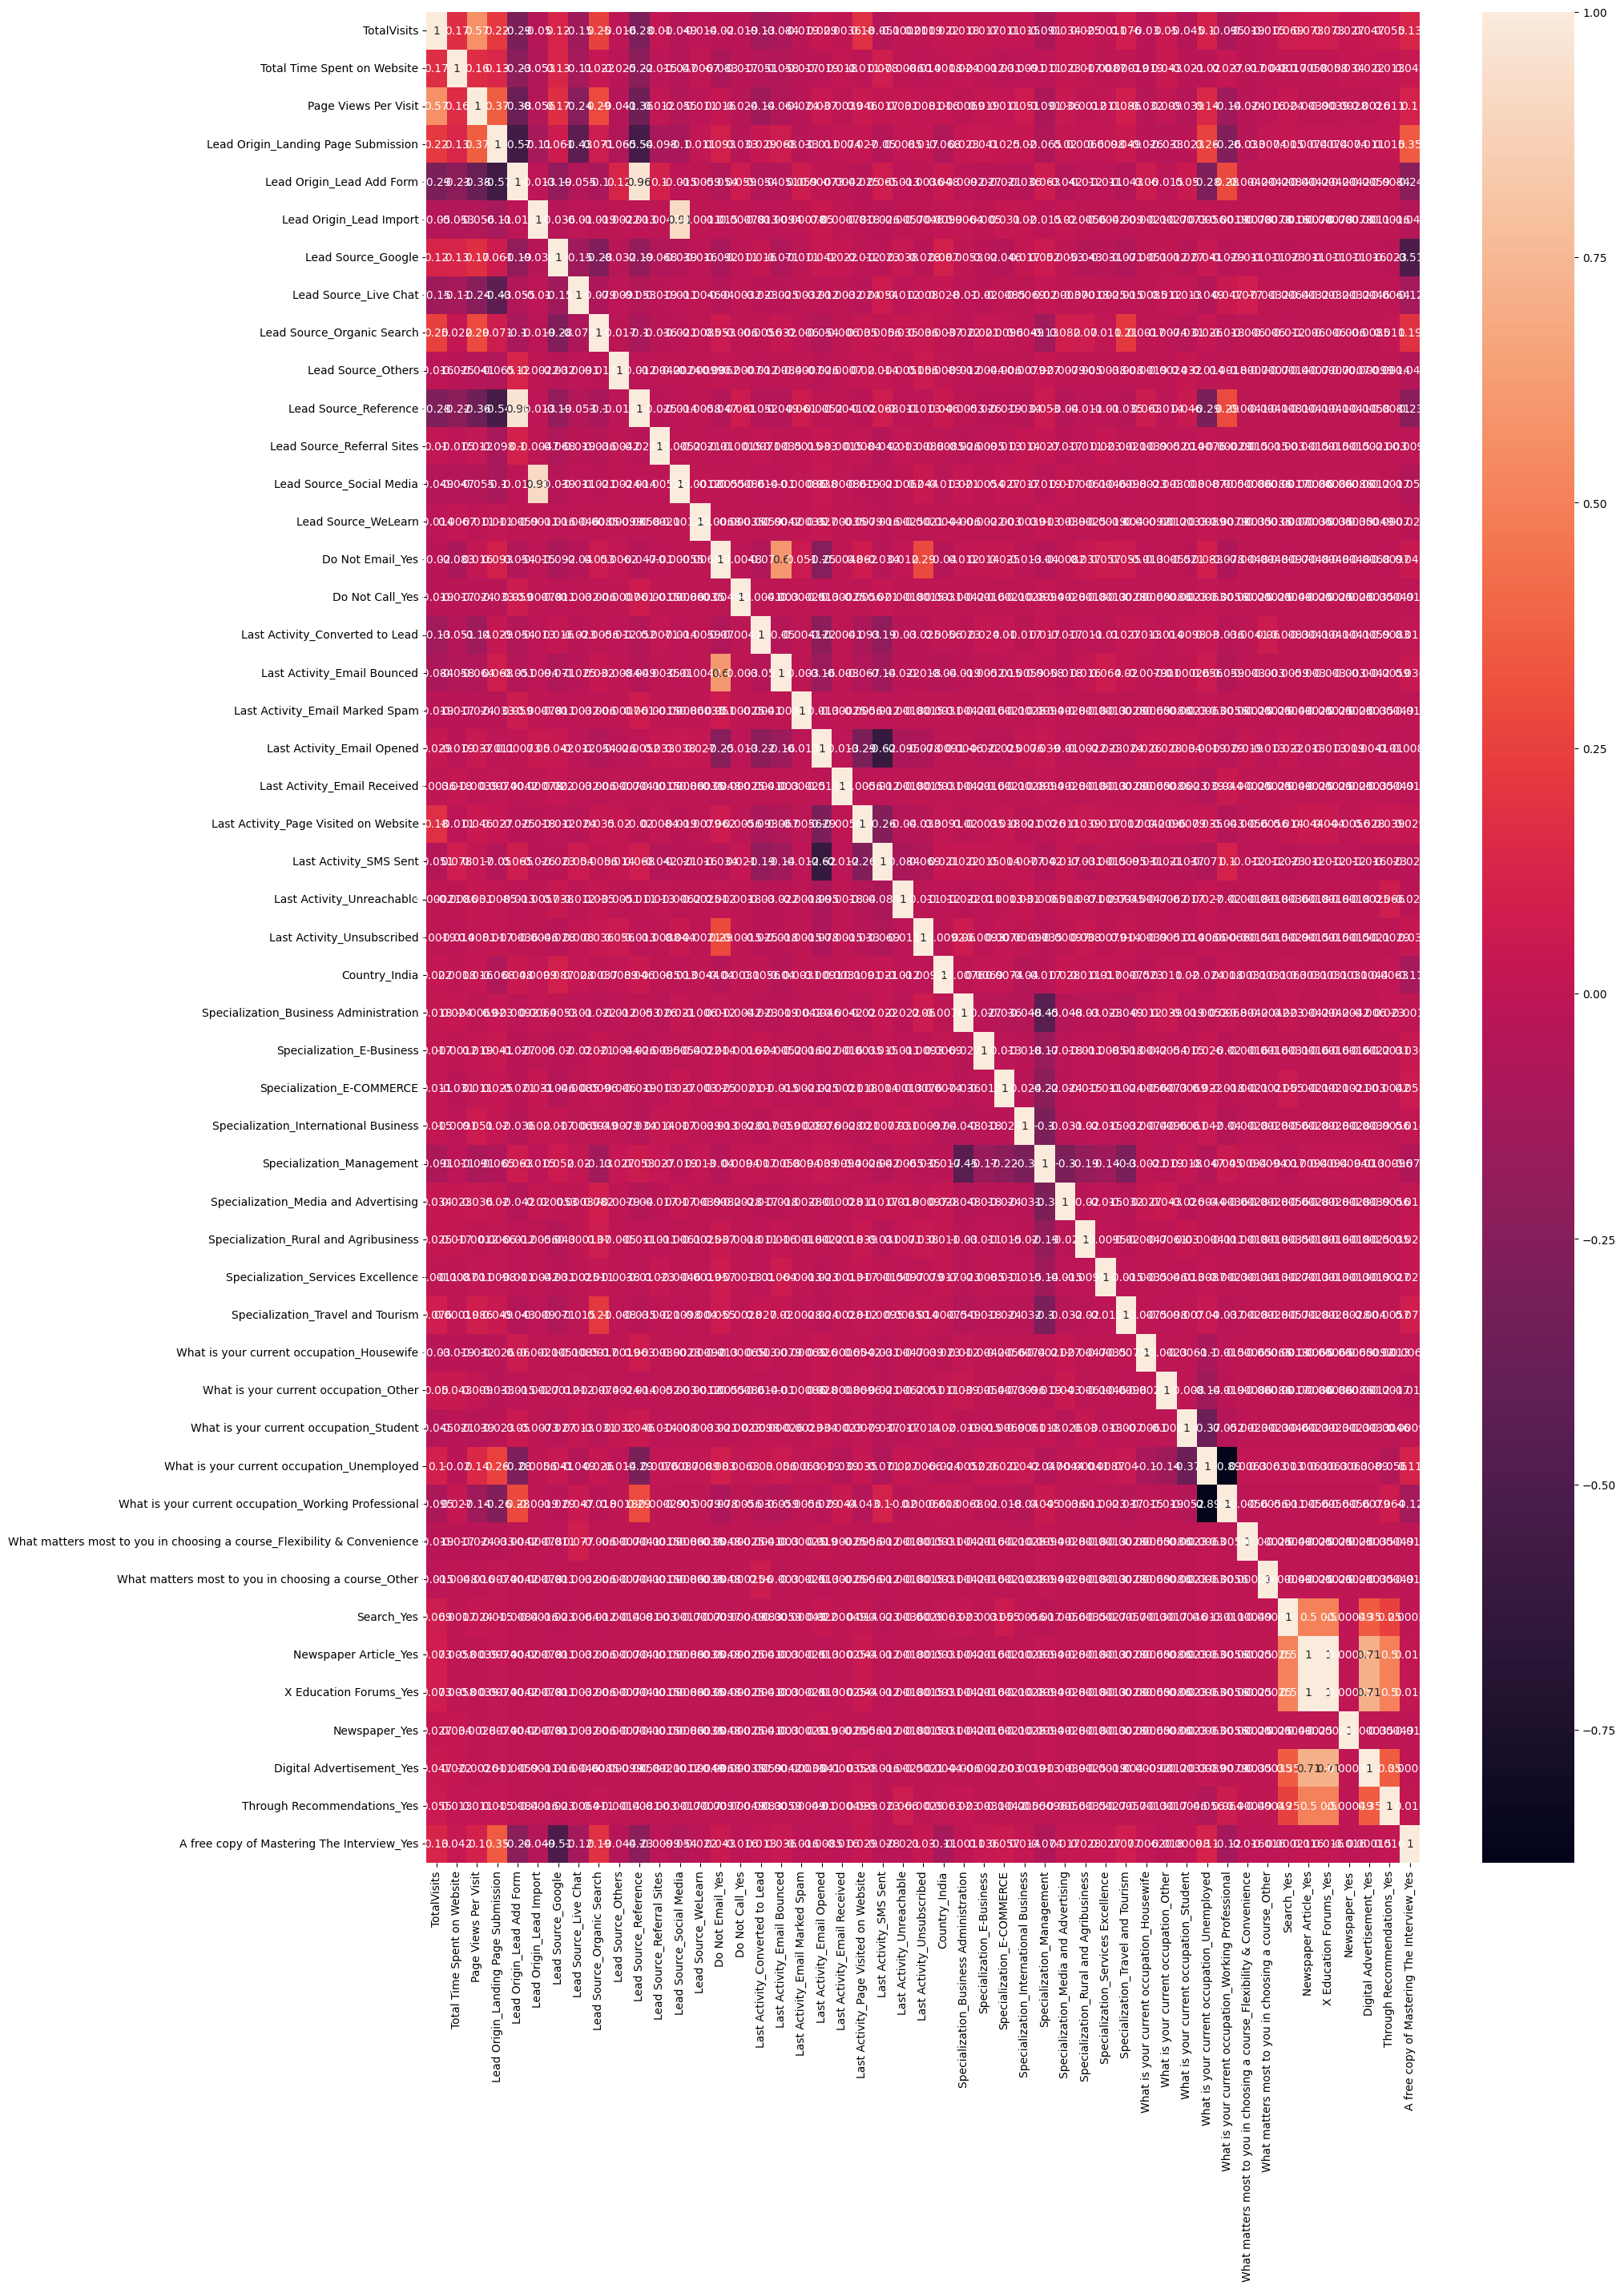

In [119]:
# Checking Correlation among independent variables
plt.figure(figsize = [20,30])
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## 7. Model Building

#### Running first training model

In [120]:
# importing required libraries
import statsmodels.api as sm

In [121]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4002
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1790.9
Date:                Tue, 27 Feb 2024   Deviance:                       3581.8
Time:                        06:30:35   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3873
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      23.7908   3.81e+04      0.001      1.000   -7.46e+04    7.47e+04
TotalVisits                                                                 1.6108      0.406      3.963      0.000       0.814       2.407
Total Time Spent on Website                                                 4.2435      0.184     23.019      0.000       3.882       4.605
Page Views Per Visit                                                       -1.3268      0.451     -2.945      0.003      -2.210      -0.444
Lead Origin_Landing Page Submission                                        -0.8267      0.167     -4.962      0.000      -1.153      -0.500
Lead Origin_Lead Add Form                                                   3.0666      1.337      2.294      0.022       0.446       5.687
Lead Origin_Lead Import                                                     1.3274      1.940      0.684      0.494      -2.476       5.131
Lead Source_Google                                                          0.0772      0.124      0.623      0.534      -0.166       0.320
Lead Source_Live Chat                                                       0.7287      0.272      2.683      0.007       0.196       1.261
Lead Source_Organic Search                                                  0.1190      0.144      0.827      0.408      -0.163       0.401
Lead Source_Others                                                          1.6942      1.361      1.244      0.213      -0.974       4.362
Lead Source_Reference                                                       0.5076      1.308      0.388      0.698      -2.056       3.072
Lead Source_Referral Sites                                                  2.1904      0.554      3.952      0.000       1.104       3.277
Lead Source_Social Media                                                    0.1232      1.821      0.068      0.946      -3.446       3.692
Lead Source_WeLearn                                                         0.7002      1.524      0.460      0.646      -2.286       3.686
Do Not Email_Yes                                                           -1.4976      0.256     -5.856      0.000      -1.999      -0.996
Do Not Call_Yes                                                            20.3898   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Converted to Lead                                            -2.9946      0.658     -4.549      0.000      -4.285      -1.704
Last Activity_Email Bounced                                                -2.4193      0.779     -3.105      0.002      -3.946      -0.892
Las

## 8. Feature Selection using Recurssive Feature Elimination - RFE

In [122]:
# importing required libraries
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()

In [124]:
from sklearn.feature_selection import RFE
rfe = RFE(logR,n_features_to_select = 20)    # Running RFE with 20 variables as output
rfe = rfe.fit(X_train,y_train)

In [125]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 4),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_WeLearn', False, 10),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 27),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Marked Spam', False, 13),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Email Received', False, 29),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', False, 8),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed

In [126]:
cols = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]  # not listed in cols

Index(['Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Do Not Call_Yes',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'Country_India',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other',
       'Newspaper Article_Yes', 'X Education Forums_Yes',
       'Di

In [127]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4030
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1803.6
Date:                Tue, 27 Feb 2024   Deviance:                       3607.1
Time:                        06:31:35   Pearson chi2:                 4.95e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7644      0.289      2.642      0.008       0.197       1.331
TotalVisits                                              1.5113      0.394      3.833      0.000       0.738       2.284
Total Time Spent on Website                              4.1749      0.181     23.102      0.000       3.821       4.529
Page Views Per Visit                                    -1.3563      0.430     -3.156      0.002      -2.199      -0.514
Lead Origin_Landing Page Submission                     -1.1939      0.132     -9.052      0.000      -1.452      -0.935
Lead Origin_Lead Add Form                                2.8058      1.297      2.164      0.030       0.264       5.348
Lead Origin_Lead Import                                  1.0742      0.685      1.568      0.117      -0.268       2.417
Lead Source_Others                                       1.7211      1.357      1.269      0.205      -0.938       4.380
Lead Source_Reference                                    0.4306      1.272      0.339      0.735      -2.062       2.923
Lead Source_Referral Sites                               2.0094      0.554      3.624      0.000       0.923       3.096
Do Not Email_Yes                                        -1.4544      0.228     -6.382      0.000      -1.901      -1.008
Last Activity_Converted to Lead                         -2.1395      0.215     -9.969      0.000      -2.560      -1.719
Last Activity_Email Bounced                             -1.5593      0.443     -3.517      0.000      -2.428      -0.690
Last Activity_Email Opened                              -0.8992      0.093     -9.673      0.000      -1.081      -0.717
Last Activity_Page Visited on Website                   -1.3208      0.151     -8.772      0.000      -1.616      -1.026
Last Activity_Unreachable                               -0.8567      0.356     -2.404      0.016      -1.555      -0.158
What is your current occupation_Housewife               22.4815   1.53e+04      0.001      0.999   -3.01e+04    3.01e+04
What is your current occupation_Unemployed              -0.7779      0.255     -3.048      0.002      -1.278      -0.278
What is your current occupation_Working Professional     2.1713      0.331      6.562      0.000       1.523       2.820
Search_Yes                                             -22.0961   2.13e+04     -0.001      0.999   -4.17e+04    4.17e+04
Newspaper_Yes                                          -24.0667   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
========================================================================================================================
"""

The p-value for some variables is high hence we'll drop them one at a time

In [128]:
# Dropping Newspaper_Yes
cols = cols.drop('Newspaper_Yes',1)
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4031
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1805.3
Date:                Tue, 27 Feb 2024   Deviance:                       3610.5
Time:                        06:31:44   Pearson chi2:                 4.94e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3829
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7703      0.289      2.664      0.008       0.203       1.337
TotalVisits                                              1.4863      0.394      3.773      0.000       0.714       2.258
Total Time Spent on Website                              4.1624      0.180     23.067      0.000       3.809       4.516
Page Views Per Visit                                    -1.3408      0.429     -3.122      0.002      -2.183      -0.499
Lead Origin_Landing Page Submission                     -1.1944      0.132     -9.060      0.000      -1.453      -0.936
Lead Origin_Lead Add Form                                2.8005      1.295      2.162      0.031       0.262       5.339
Lead Origin_Lead Import                                  1.0719      0.685      1.565      0.118      -0.271       2.415
Lead Source_Others                                       1.7180      1.356      1.267      0.205      -0.941       4.377
Lead Source_Reference                                    0.4326      1.270      0.340      0.733      -2.058       2.923
Lead Source_Referral Sites                               2.0096      0.554      3.626      0.000       0.923       3.096
Do Not Email_Yes                                        -1.4539      0.228     -6.383      0.000      -1.900      -1.008
Last Activity_Converted to Lead                         -2.1391      0.215     -9.971      0.000      -2.560      -1.719
Last Activity_Email Bounced                             -1.5589      0.443     -3.517      0.000      -2.428      -0.690
Last Activity_Email Opened                              -0.9018      0.093     -9.705      0.000      -1.084      -0.720
Last Activity_Page Visited on Website                   -1.3179      0.150     -8.760      0.000      -1.613      -1.023
Last Activity_Unreachable                               -0.8569      0.356     -2.406      0.016      -1.555      -0.159
What is your current occupation_Housewife               22.4806   1.53e+04      0.001      0.999   -3.01e+04    3.01e+04
What is your current occupation_Unemployed              -0.7790      0.255     -3.054      0.002      -1.279      -0.279
What is your current occupation_Working Professional     2.1703      0.331      6.562      0.000       1.522       2.819
Search_Yes                                             -22.0869   2.13e+04     -0.001      0.999   -4.18e+04    4.17e+04
========================================================================================================================
"""

In [129]:
# Dropping Search_Yes
cols = cols.drop('Search_Yes',1)
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4032
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1807.3
Date:                Tue, 27 Feb 2024   Deviance:                       3614.5
Time:                        06:31:46   Pearson chi2:                 4.95e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7801      0.289      2.699      0.007       0.214       1.347
TotalVisits                                              1.4321      0.392      3.657      0.000       0.665       2.200
Total Time Spent on Website                              4.1586      0.180     23.065      0.000       3.805       4.512
Page Views Per Visit                                    -1.3218      0.429     -3.083      0.002      -2.162      -0.481
Lead Origin_Landing Page Submission                     -1.1962      0.132     -9.076      0.000      -1.454      -0.938
Lead Origin_Lead Add Form                                2.7880      1.294      2.154      0.031       0.251       5.325
Lead Origin_Lead Import                                  1.0681      0.685      1.559      0.119      -0.275       2.411
Lead Source_Others                                       1.7195      1.357      1.267      0.205      -0.939       4.378
Lead Source_Reference                                    0.4399      1.270      0.347      0.729      -2.048       2.928
Lead Source_Referral Sites                               2.0145      0.554      3.635      0.000       0.928       3.101
Do Not Email_Yes                                        -1.4526      0.228     -6.377      0.000      -1.899      -1.006
Last Activity_Converted to Lead                         -2.1410      0.215     -9.981      0.000      -2.561      -1.721
Last Activity_Email Bounced                             -1.5609      0.443     -3.522      0.000      -2.430      -0.692
Last Activity_Email Opened                              -0.9048      0.093     -9.742      0.000      -1.087      -0.723
Last Activity_Page Visited on Website                   -1.3212      0.150     -8.784      0.000      -1.616      -1.026
Last Activity_Unreachable                               -0.8573      0.356     -2.407      0.016      -1.555      -0.159
What is your current occupation_Housewife               22.4790   1.53e+04      0.001      0.999   -3.01e+04    3.01e+04
What is your current occupation_Unemployed              -0.7816      0.255     -3.065      0.002      -1.281      -0.282
What is your current occupation_Working Professional     2.1691      0.331      6.559      0.000       1.521       2.817
========================================================================================================================
"""

In [130]:
# Dropping What is your current occupation_Housewife
cols = cols.drop('What is your current occupation_Housewife',1)
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4033
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1811.5
Date:                Tue, 27 Feb 2024   Deviance:                       3623.0
Time:                        06:31:46   Pearson chi2:                 4.96e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3810
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9316      0.283      3.289      0.001       0.376       1.487
TotalVisits                                              1.4263      0.392      3.643      0.000       0.659       2.194
Total Time Spent on Website                              4.1547      0.180     23.058      0.000       3.802       4.508
Page Views Per Visit                                    -1.3322      0.429     -3.108      0.002      -2.172      -0.492
Lead Origin_Landing Page Submission                     -1.1884      0.132     -9.025      0.000      -1.447      -0.930
Lead Origin_Lead Add Form                                2.7916      1.296      2.155      0.031       0.252       5.331
Lead Origin_Lead Import                                  1.0708      0.685      1.563      0.118      -0.272       2.413
Lead Source_Others                                       1.7188      1.357      1.266      0.205      -0.942       4.379
Lead Source_Reference                                    0.4447      1.271      0.350      0.726      -2.046       2.936
Lead Source_Referral Sites                               2.0141      0.554      3.636      0.000       0.928       3.100
Do Not Email_Yes                                        -1.4527      0.228     -6.381      0.000      -1.899      -1.006
Last Activity_Converted to Lead                         -2.1149      0.212     -9.954      0.000      -2.531      -1.698
Last Activity_Email Bounced                             -1.5684      0.444     -3.533      0.000      -2.438      -0.698
Last Activity_Email Opened                              -0.9017      0.093     -9.712      0.000      -1.084      -0.720
Last Activity_Page Visited on Website                   -1.3231      0.150     -8.800      0.000      -1.618      -1.028
Last Activity_Unreachable                               -0.8550      0.356     -2.401      0.016      -1.553      -0.157
What is your current occupation_Unemployed              -0.9377      0.248     -3.781      0.000      -1.424      -0.452
What is your current occupation_Working Professional     2.0106      0.325      6.187      0.000       1.374       2.648
========================================================================================================================
"""

In [131]:
# Dropping Lead Source_Reference
cols = cols.drop('Lead Source_Reference',1)
X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res1 = logm6.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4034
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1811.6
Date:                Tue, 27 Feb 2024   Deviance:                       3623.2
Time:                        06:31:46   Pearson chi2:                 4.95e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3810
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9304      0.283      3.285      0.001       0.375       1.485
TotalVisits                                              1.4275      0.392      3.646      0.000       0.660       2.195
Total Time Spent on Website                              4.1545      0.180     23.058      0.000       3.801       4.508
Page Views Per Visit                                    -1.3296      0.429     -3.101      0.002      -2.170      -0.489
Lead Origin_Landing Page Submission                     -1.1884      0.132     -9.025      0.000      -1.446      -0.930
Lead Origin_Lead Add Form                                3.2274      0.375      8.617      0.000       2.493       3.962
Lead Origin_Lead Import                                  1.0708      0.685      1.563      0.118      -0.272       2.413
Lead Source_Others                                       1.6719      1.373      1.218      0.223      -1.019       4.363
Lead Source_Referral Sites                               1.9975      0.554      3.607      0.000       0.912       3.083
Do Not Email_Yes                                        -1.4499      0.228     -6.369      0.000      -1.896      -1.004
Last Activity_Converted to Lead                         -2.1140      0.212     -9.952      0.000      -2.530      -1.698
Last Activity_Email Bounced                             -1.5704      0.444     -3.538      0.000      -2.440      -0.700
Last Activity_Email Opened                              -0.9010      0.093     -9.708      0.000      -1.083      -0.719
Last Activity_Page Visited on Website                   -1.3215      0.150     -8.793      0.000      -1.616      -1.027
Last Activity_Unreachable                               -0.8548      0.356     -2.401      0.016      -1.552      -0.157
What is your current occupation_Unemployed              -0.9373      0.248     -3.781      0.000      -1.423      -0.451
What is your current occupation_Working Professional     2.0107      0.325      6.188      0.000       1.374       2.648
========================================================================================================================
"""

In [132]:
# Dropping Lead Source_Others
cols = cols.drop('Lead Source_Others',1)
X_train_sm = sm.add_constant(X_train[cols])
logm7 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res1 = logm7.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4035
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1812.3
Date:                Tue, 27 Feb 2024   Deviance:                       3624.7
Time:                        06:31:46   Pearson chi2:                 4.97e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3807
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9320      0.283      3.292      0.001       0.377       1.487
TotalVisits                                              1.4237      0.391      3.638      0.000       0.657       2.191
Total Time Spent on Website                              4.1490      0.180     23.045      0.000       3.796       4.502
Page Views Per Visit                                    -1.3338      0.429     -3.112      0.002      -2.174      -0.494
Lead Origin_Landing Page Submission                     -1.1861      0.132     -9.011      0.000      -1.444      -0.928
Lead Origin_Lead Add Form                                3.2481      0.374      8.677      0.000       2.514       3.982
Lead Origin_Lead Import                                  1.0701      0.685      1.562      0.118      -0.273       2.413
Lead Source_Referral Sites                               1.9959      0.554      3.604      0.000       0.911       3.081
Do Not Email_Yes                                        -1.4471      0.227     -6.376      0.000      -1.892      -1.002
Last Activity_Converted to Lead                         -2.1161      0.212     -9.963      0.000      -2.532      -1.700
Last Activity_Email Bounced                             -1.5749      0.444     -3.551      0.000      -2.444      -0.706
Last Activity_Email Opened                              -0.9030      0.093     -9.733      0.000      -1.085      -0.721
Last Activity_Page Visited on Website                   -1.3175      0.150     -8.772      0.000      -1.612      -1.023
Last Activity_Unreachable                               -0.8570      0.356     -2.408      0.016      -1.555      -0.159
What is your current occupation_Unemployed              -0.9360      0.248     -3.777      0.000      -1.422      -0.450
What is your current occupation_Working Professional     2.0102      0.325      6.188      0.000       1.373       2.647
========================================================================================================================
"""

In [133]:
# Dropping Lead Origin_Lead Import
cols = cols.drop('Lead Origin_Lead Import',1)
X_train_sm = sm.add_constant(X_train[cols])
logm8 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res1 = logm8.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4036
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1813.6
Date:                Tue, 27 Feb 2024   Deviance:                       3627.1
Time:                        06:31:46   Pearson chi2:                 4.97e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3804
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9625      0.282      3.407      0.001       0.409       1.516
TotalVisits                                              1.4026      0.391      3.587      0.000       0.636       2.169
Total Time Spent on Website                              4.1345      0.180     23.007      0.000       3.782       4.487
Page Views Per Visit                                    -1.3466      0.429     -3.141      0.002      -2.187      -0.506
Lead Origin_Landing Page Submission                     -1.2149      0.131     -9.303      0.000      -1.471      -0.959
Lead Origin_Lead Add Form                                3.2081      0.373      8.590      0.000       2.476       3.940
Lead Source_Referral Sites                               1.9874      0.555      3.583      0.000       0.900       3.074
Do Not Email_Yes                                        -1.4458      0.227     -6.371      0.000      -1.891      -1.001
Last Activity_Converted to Lead                         -2.1204      0.212     -9.986      0.000      -2.537      -1.704
Last Activity_Email Bounced                             -1.5779      0.444     -3.557      0.000      -2.447      -0.709
Last Activity_Email Opened                              -0.8958      0.093     -9.674      0.000      -1.077      -0.714
Last Activity_Page Visited on Website                   -1.3165      0.150     -8.769      0.000      -1.611      -1.022
Last Activity_Unreachable                               -0.8583      0.356     -2.411      0.016      -1.556      -0.161
What is your current occupation_Unemployed              -0.9294      0.248     -3.752      0.000      -1.415      -0.444
What is your current occupation_Working Professional     2.0127      0.325      6.196      0.000       1.376       2.649
========================================================================================================================
"""

In [134]:
# Dropping Last Activity_Unreachable
cols = cols.drop('Last Activity_Unreachable',1)
X_train_sm = sm.add_constant(X_train[cols])
logm9 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res1 = logm9.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4037
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1816.7
Date:                Tue, 27 Feb 2024   Deviance:                       3633.3
Time:                        06:31:46   Pearson chi2:                 4.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9368      0.282      3.321      0.001       0.384       1.490
TotalVisits                                              1.4142      0.391      3.619      0.000       0.648       2.180
Total Time Spent on Website                              4.1391      0.180     23.053      0.000       3.787       4.491
Page Views Per Visit                                    -1.3632      0.428     -3.187      0.001      -2.201      -0.525
Lead Origin_Landing Page Submission                     -1.2149      0.130     -9.311      0.000      -1.471      -0.959
Lead Origin_Lead Add Form                                3.2104      0.373      8.596      0.000       2.478       3.942
Lead Source_Referral Sites                               1.9710      0.557      3.536      0.000       0.879       3.063
Do Not Email_Yes                                        -1.4457      0.226     -6.383      0.000      -1.890      -1.002
Last Activity_Converted to Lead                         -2.0894      0.212     -9.858      0.000      -2.505      -1.674
Last Activity_Email Bounced                             -1.5471      0.443     -3.490      0.000      -2.416      -0.678
Last Activity_Email Opened                              -0.8643      0.092     -9.429      0.000      -1.044      -0.685
Last Activity_Page Visited on Website                   -1.2859      0.150     -8.596      0.000      -1.579      -0.993
What is your current occupation_Unemployed              -0.9354      0.248     -3.779      0.000      -1.421      -0.450
What is your current occupation_Working Professional     2.0077      0.325      6.185      0.000       1.372       2.644
========================================================================================================================
"""

In [135]:
# Getting predicted values on the Train set
y_train_pred = res1.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32862649, 0.11868107, 0.67923051, 0.75269928, 0.1529882 ,
       0.38950307, 0.69545282, 0.41483613, 0.33794267, 0.83917821])

#### Creating a seperate Data Frame with actual Lead converted and predicted probabilities

In [136]:
y_train_pred_final = pd.DataFrame({'ProspectID':y_train.index,'Converted':y_train.values,'Pred_Prob':y_train_pred})
y_train_pred_final.head()

ProspectID  Converted  Pred_Prob
0        1016          0   0.328626
1        1725          0   0.118681
2          48          0   0.679231
3        7909          1   0.752699
4        6045          0   0.152988

#### Creating a new column Predicted with 1 if Pred_prob >0.5 else 0

In [137]:
y_train_pred_final['Predicted'] = y_train_pred_final['Pred_Prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

ProspectID  Converted  Pred_Prob  Predicted
0        1016          0   0.328626          0
1        1725          0   0.118681          0
2          48          0   0.679231          1
3        7909          1   0.752699          1
4        6045          0   0.152988          0

In [138]:
# Confusion matrix
from sklearn import metrics
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion1

array([[1909,  341],
       [ 484, 1317]])

In [139]:
# Overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.7963465810910886


#### Checking VIF

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Referral Sites', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [142]:
vif = pd.DataFrame()
X_train = X_train[cols]
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
11         What is your current occupation_Unemployed  9.37
3                 Lead Origin_Landing Page Submission  7.75
2                                Page Views Per Visit  5.56
0                                         TotalVisits  3.94
1                         Total Time Spent on Website  2.33
9                          Last Activity_Email Opened  2.08
12  What is your current occupation_Working Profes...  2.00
6                                    Do Not Email_Yes  1.83
8                         Last Activity_Email Bounced  1.68
4                           Lead Origin_Lead Add Form  1.59
10              Last Activity_Page Visited on Website  1.33
7                     Last Activity_Converted to Lead  1.20
5                          Lead Source_Referral Sites  1.03

In [143]:
# Dropping What is your current occupation_Unemployed
cols = cols.drop('What is your current occupation_Unemployed',1)
X_train_sm = sm.add_constant(X_train[cols])
logm10 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res2 = logm10.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4038
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1823.8
Date:                Tue, 27 Feb 2024   Deviance:                       3647.5
Time:                        06:31:47   Pearson chi2:                 5.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3772
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0215      0.144      0.149      0.882      -0.261       0.304
TotalVisits                                              1.3887      0.390      3.562      0.000       0.625       2.153
Total Time Spent on Website                              4.1303      0.179     23.063      0.000       3.779       4.481
Page Views Per Visit                                    -1.3479      0.427     -3.159      0.002      -2.184      -0.512
Lead Origin_Landing Page Submission                     -1.2180      0.130     -9.356      0.000      -1.473      -0.963
Lead Origin_Lead Add Form                                3.2709      0.373      8.776      0.000       2.540       4.001
Lead Source_Referral Sites                               1.9331      0.557      3.469      0.001       0.841       3.025
Do Not Email_Yes                                        -1.4532      0.227     -6.401      0.000      -1.898      -1.008
Last Activity_Converted to Lead                         -2.0686      0.212     -9.758      0.000      -2.484      -1.653
Last Activity_Email Bounced                             -1.5018      0.440     -3.416      0.001      -2.364      -0.640
Last Activity_Email Opened                              -0.8408      0.091     -9.223      0.000      -1.019      -0.662
Last Activity_Page Visited on Website                   -1.2638      0.149     -8.469      0.000      -1.556      -0.971
What is your current occupation_Working Professional     2.9115      0.220     13.230      0.000       2.480       3.343
========================================================================================================================
"""

In [144]:
# Getting predicted values on the Train set using Model 10
y_train_pred = res2.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33209832, 0.12294934, 0.68735921, 0.7529526 , 0.15758928,
       0.3920804 , 0.69941825, 0.41668175, 0.34145598, 0.8406166 ])

In [145]:
y_train_pred_final = pd.DataFrame({'ProspectID':y_train.index,'Converted':y_train.values,'Pred_Prob':y_train_pred})
y_train_pred_final.head()

ProspectID  Converted  Pred_Prob
0        1016          0   0.332098
1        1725          0   0.122949
2          48          0   0.687359
3        7909          1   0.752953
4        6045          0   0.157589

In [146]:
y_train_pred_final['Predicted'] = y_train_pred_final['Pred_Prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

ProspectID  Converted  Pred_Prob  Predicted
0        1016          0   0.332098          0
1        1725          0   0.122949          0
2          48          0   0.687359          1
3        7909          1   0.752953          1
4        6045          0   0.157589          0

In [147]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion2

array([[1899,  351],
       [ 490, 1311]])

In [148]:
# Overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.7923969390274006


In [149]:
vif = pd.DataFrame()
X_train = X_train[cols]
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2                                Page Views Per Visit  5.37
3                 Lead Origin_Landing Page Submission  4.97
0                                         TotalVisits  3.89
1                         Total Time Spent on Website  2.19
9                          Last Activity_Email Opened  1.92
6                                    Do Not Email_Yes  1.82
8                         Last Activity_Email Bounced  1.67
10              Last Activity_Page Visited on Website  1.31
4                           Lead Origin_Lead Add Form  1.22
11  What is your current occupation_Working Profes...  1.22
7                     Last Activity_Converted to Lead  1.15
5                          Lead Source_Referral Sites  1.03

In [150]:
# Dropping Page Views Per Visit
cols = cols.drop('Page Views Per Visit',1)
X_train_sm = sm.add_constant(X_train[cols])
logm11 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res3 = logm11.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4039
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1828.8
Date:                Tue, 27 Feb 2024   Deviance:                       3657.6
Time:                        06:31:48   Pearson chi2:                 4.99e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3757
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0831      0.141     -0.592      0.554      -0.359       0.192
TotalVisits                                              0.7834      0.340      2.303      0.021       0.117       1.450
Total Time Spent on Website                              4.1064      0.178     23.005      0.000       3.757       4.456
Lead Origin_Landing Page Submission                     -1.2973      0.128    -10.124      0.000      -1.548      -1.046
Lead Origin_Lead Add Form                                3.3610      0.372      9.044      0.000       2.633       4.089
Lead Source_Referral Sites                               1.8329      0.550      3.334      0.001       0.755       2.910
Do Not Email_Yes                                        -1.4779      0.226     -6.530      0.000      -1.921      -1.034
Last Activity_Converted to Lead                         -2.0101      0.212     -9.498      0.000      -2.425      -1.595
Last Activity_Email Bounced                             -1.4084      0.437     -3.221      0.001      -2.265      -0.552
Last Activity_Email Opened                              -0.8293      0.091     -9.122      0.000      -1.007      -0.651
Last Activity_Page Visited on Website                   -1.2064      0.147     -8.196      0.000      -1.495      -0.918
What is your current occupation_Working Professional     2.9079      0.220     13.247      0.000       2.478       3.338
========================================================================================================================
"""

In [151]:
# Getting predicted values on the Train set using Model 8
y_train_pred = res3.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33169474, 0.11770916, 0.75001008, 0.77334448, 0.14135721,
       0.34636076, 0.60139287, 0.38932834, 0.327281  , 0.83001607])

In [152]:
y_train_pred_final = pd.DataFrame({'ProspectID':y_train.index,'Converted':y_train.values,'Pred_Prob':y_train_pred})
y_train_pred_final.head()

ProspectID  Converted  Pred_Prob
0        1016          0   0.331695
1        1725          0   0.117709
2          48          0   0.750010
3        7909          1   0.773344
4        6045          0   0.141357

In [153]:
y_train_pred_final['Predicted'] = y_train_pred_final['Pred_Prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

ProspectID  Converted  Pred_Prob  Predicted
0        1016          0   0.331695          0
1        1725          0   0.117709          0
2          48          0   0.750010          1
3        7909          1   0.773344          1
4        6045          0   0.141357          0

In [154]:
# Confusion matrix
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion3

array([[1913,  337],
       [ 527, 1274]])

In [155]:
# Overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.7867193285608491


In [156]:
vif = pd.DataFrame()
X_train = X_train[cols]
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  3.94
0                                         TotalVisits  2.76
1                         Total Time Spent on Website  2.17
8                          Last Activity_Email Opened  1.91
5                                    Do Not Email_Yes  1.81
7                         Last Activity_Email Bounced  1.66
9               Last Activity_Page Visited on Website  1.30
3                           Lead Origin_Lead Add Form  1.22
10  What is your current occupation_Working Profes...  1.22
6                     Last Activity_Converted to Lead  1.14
4                          Lead Source_Referral Sites  1.03

In [157]:
# Dropping TotalVisits
cols = cols.drop('TotalVisits',1)
X_train_sm = sm.add_constant(X_train[cols])
logm12 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res4 = logm12.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4040
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1831.4
Date:                Tue, 27 Feb 2024   Deviance:                       3662.9
Time:                        06:31:48   Pearson chi2:                 5.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3749
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0127      0.134      0.095      0.925      -0.250       0.275
Total Time Spent on Website                              4.1303      0.178     23.181      0.000       3.781       4.480
Lead Origin_Landing Page Submission                     -1.2695      0.127     -9.990      0.000      -1.519      -1.020
Lead Origin_Lead Add Form                                3.2633      0.369      8.845      0.000       2.540       3.986
Lead Source_Referral Sites                               1.8910      0.552      3.426      0.001       0.809       2.973
Do Not Email_Yes                                        -1.4766      0.226     -6.533      0.000      -1.920      -1.034
Last Activity_Converted to Lead                         -2.0563      0.210     -9.780      0.000      -2.468      -1.644
Last Activity_Email Bounced                             -1.4471      0.436     -3.315      0.001      -2.303      -0.592
Last Activity_Email Opened                              -0.8233      0.091     -9.066      0.000      -1.001      -0.645
Last Activity_Page Visited on Website                   -1.1484      0.145     -7.939      0.000      -1.432      -0.865
What is your current occupation_Working Professional     2.8997      0.219     13.211      0.000       2.470       3.330
========================================================================================================================
"""

In [158]:
vif = pd.DataFrame()
X_train = X_train[cols]
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
1                Lead Origin_Landing Page Submission  3.23
0                        Total Time Spent on Website  2.08
7                         Last Activity_Email Opened  1.87
4                                   Do Not Email_Yes  1.81
6                        Last Activity_Email Bounced  1.66
8              Last Activity_Page Visited on Website  1.24
2                          Lead Origin_Lead Add Form  1.22
9  What is your current occupation_Working Profes...  1.22
5                    Last Activity_Converted to Lead  1.14
3                         Lead Source_Referral Sites  1.02

In [159]:
# Getting Predicted values on Train set using Model 9
y_train_pred = res4.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34062108, 0.12543246, 0.74861285, 0.72335213, 0.12947554,
       0.32928312, 0.48580648, 0.33169656, 0.34266552, 0.8413377 ])

In [160]:
y_train_pred_final = pd.DataFrame({'ProspectID':y_train.index,'Converted':y_train.values,'Pred_Prob':y_train_pred})
y_train_pred_final['Predicted'] = y_train_pred_final['Pred_Prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

ProspectID  Converted  Pred_Prob  Predicted
0        1016          0   0.340621          0
1        1725          0   0.125432          0
2          48          0   0.748613          1
3        7909          1   0.723352          1
4        6045          0   0.129476          0

In [161]:
# Confusion Matrix
confusion4 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion4

array([[1897,  353],
       [ 498, 1303]])

In [162]:
# Overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.7899284127375956


Both the p- value and VIF are within the required range, now we stop iterations on the Logistics Regression model and check metrics other than Accuracy

## 9. Metrics beyond Accuracy

In [163]:
TP = confusion4[1,1]  # True Positive
TN = confusion4[0,0]  # True Negative
FP = confusion4[0,1]  # False Positive
FN = confusion4[1,0]  # False Negative

In [164]:
# Checking Sensitivity of Logistic Regression model
sens = TP/float(TP+FN)
sens

0.7234869516935036

In [165]:
# Checking Specificty of Logistic Regression model
spec = TN/float(FP+TN)
spec

0.8431111111111111

In [166]:
# Checking False Positive rate
print(FP/float(TN+FP))

0.15688888888888888


In [167]:
# Positive Predicted value
print(TP/(TP+FP))

0.7868357487922706


In [168]:
# Negative Predicted value
print(TN/float(TN+FN))

0.7920668058455115


## 10. Plotting ROC Curve

In [169]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [170]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Pred_Prob, drop_intermediate = False )

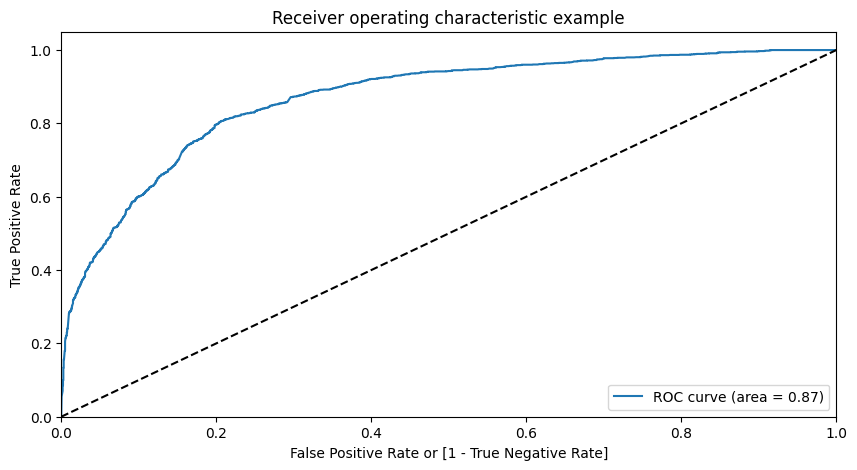

In [171]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Pred_Prob)

## 11. Finding Optimal Cut-Off point

In order to find the Cut-off point i.e. the value of Prediction probability for which we can say a Lead is going to be converted, we find the probabilities at different cut-off points and check the metrics fro those cut-off.

In [172]:
y_train_pred_final.head()

ProspectID  Converted  Pred_Prob  Predicted
0        1016          0   0.340621          0
1        1725          0   0.125432          0
2          48          0   0.748613          1
3        7909          1   0.723352          1
4        6045          0   0.129476          0

In [173]:
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i] = y_train_pred_final['Pred_Prob'].map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

ProspectID  Converted  Pred_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        1016          0   0.340621          0    1    1    1    1    0    0   
1        1725          0   0.125432          0    1    1    0    0    0    0   
2          48          0   0.748613          1    1    1    1    1    1    1   
3        7909          1   0.723352          1    1    1    1    1    1    1   
4        6045          0   0.129476          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    1    1    0    0  
3    1    1    0    0  
4    0    0    0    0

In [174]:
# Calculating Accuracy, Sensitivity and Specificity for different cutoff
cutoff = pd.DataFrame(columns = ['prob','Accuracy','Sensitivity','Specificity'])
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    acc = (cm1[0,0]+cm1[1,1])/total1
    sens = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    spec = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff.loc[i] = [i,acc,sens,spec]
print(cutoff)

     prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.444582     1.000000     0.000000
0.1   0.1  0.546038     0.987229     0.192889
0.2   0.2  0.711429     0.940589     0.528000
0.3   0.3  0.773389     0.876735     0.690667
0.4   0.4  0.798568     0.796780     0.800000
0.5   0.5  0.789928     0.723487     0.843111
0.6   0.6  0.768205     0.615769     0.890222
0.7   0.7  0.745742     0.516935     0.928889
0.8   0.8  0.717847     0.410328     0.964000
0.9   0.9  0.677857     0.291505     0.987111


<Figure size 1000x500 with 0 Axes>

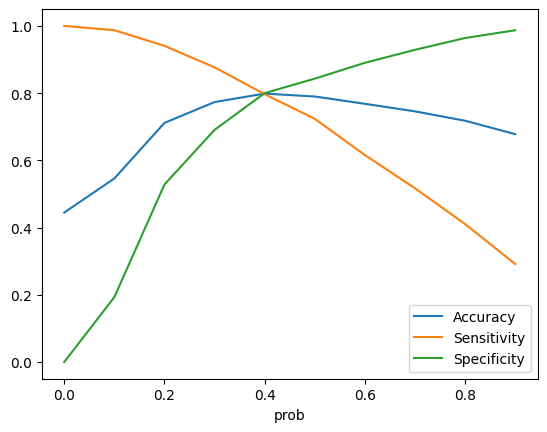

In [175]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (10,5))
cutoff.plot.line(x='prob', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

From the curve above, **0.4** is the optimum point to take it as a cut-off probability as all three metrics looks to have similar values at this cut-off.

In [176]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Pred_Prob.map(lambda x: 1 if x>0.4 else 0)
y_train_pred_final.head()

ProspectID  Converted  Pred_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        1016          0   0.340621          0    1    1    1    1    0    0   
1        1725          0   0.125432          0    1    1    0    0    0    0   
2          48          0   0.748613          1    1    1    1    1    1    1   
3        7909          1   0.723352          1    1    1    1    1    1    1   
4        6045          0   0.129476          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  Final_Predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    1    1    0    0                1  
3    1    1    0    0                1  
4    0    0    0    0                0

In [177]:
# Calculating Overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted))

0.7985682547519131


In [178]:
confusion5 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted)
print(confusion5)

[[1800  450]
 [ 366 1435]]


In [179]:
TP = confusion5[1,1]  # True Positive
TN = confusion5[0,0]  # True Negative
FP = confusion5[0,1]  # False Positive
FN = confusion5[1,0]  # False Negative

In [180]:
# Sensitivity of Logistic Regression Model
sensi = TP/float(TP+FN)
sensi

0.7967795669072737

In [181]:
# Specificity of Logistic Regression Model
speci = TN/float(TN+FP)
speci

0.8

In [182]:
# Calculating False Positive rate
print(FP/float(TN+FP))

0.2


In [183]:
# Calculating Negative predicted values
print(TN/float(TN+FN))

0.8310249307479224


## 12. Precision and Recall

In [184]:
confusion5

array([[1800,  450],
       [ 366, 1435]])

Precision:**TP/TP+FP**

In [185]:
# Positive Predicted Value
print(confusion5[1,1]/(confusion5[1,1]+confusion5[0,1]))

0.7612732095490716


Recall: **TP/TP+FN**

In [186]:
# Sensitivity
print(confusion5[1,1]/(confusion5[1,1]+confusion5[1,0]))

0.7967795669072737


In [187]:
from sklearn.metrics import precision_score,recall_score

In [188]:
precision_score(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted)

0.7612732095490716

In [189]:
recall_score(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted)

0.7967795669072737

Note that Positive Predicted value is nothing but the Precision of a Model and similarly Sensitivity is Recall.

## Precision and Recall Trade off

In [190]:
from sklearn.metrics import precision_recall_curve

In [191]:
p,r,threshold = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Pred_Prob)

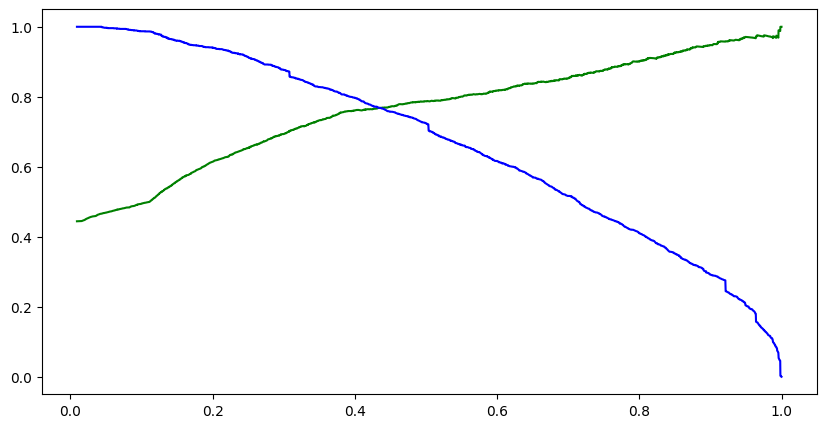

In [192]:
plt.figure(figsize = (10,5))
plt.plot(threshold,p[:-1],'g')
plt.plot(threshold,r[:-1],'b')
plt.show()

The Cut-off given by Precision Recall curve and from Optimal Cut-off calculations are almost same i.e. 0.4.

## 13. Making Predictions on Test set

In [193]:
num_vars

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [194]:
# Scaling numerical variables
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8903     0.333333                     0.007482                0.5625   
3562     0.111111                     0.096831                0.1875   
5518     0.296296                     0.077905                0.2500   
1222     0.111111                     0.183539                0.1875   
3712     0.074074                     0.179577                0.1250   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8903                                    1                          0   
3562                                    1                          0   
5518                                    1                          0   
1222                                    1                          0   
3712                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Live Chat  \
8903                        0                   0                      0   
3562                        0                   1                      0   
5518                        0                   1                      0   
1222                        0                   0                      0   
3712                        0                   0                      0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
8903                           0                   0                      0   
3562                           0                   0                      0   
5518                           0                   0                      0   
1222                           0                   0                      0   
3712                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
8903                           0                         0   
3562                           0                         0   
5518                           0                         0   
1222                           0                         0   
3712                           0                         0   

      Lead Source_WeLearn  Do Not Email_Yes  Do Not Call_Yes  \
8903                    0                 1                0   
3562                    0                 0                0   
5518                    0                 0                0   
1222                    0                 0                0   
3712                    0                 0                0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
8903                                0                            0   
3562                                0                            0   
5518                                0                            0   
1222                                0                            0   
3712                                0                            0   

      Last Activity_Email Marked Spam  Last Activity_Email Opened  \
8903                                0                           0   
3562                                0                           0   
5518                                0                           1   
1222                                0                           1   
3712                                0                           0   

      Last Activity_Email Received  Last Activity_Page Visited on Website  \
8903                             0                                      0   
3562                             0                                      0   
5518                             0                                      0   
1222                             0                                      0   
3712                             0                                      1   

      Last Activity_SMS Sent  Last Activity_Unreachable  \
8903                       1                          0   
3562                       1     

In [195]:
X_test = X_test[cols]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
8903                     0.007482                                    1   
3562                     0.096831                                    1   
5518                     0.077905                                    1   
1222                     0.183539                                    1   
3712                     0.179577                                    1   

      Lead Origin_Lead Add Form  Lead Source_Referral Sites  Do Not Email_Yes  \
8903                          0                           0                 1   
3562                          0                           0                 0   
5518                          0                           0                 0   
1222                          0                           0                 0   
3712                          0                           0                 0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
8903                                0                            0   
3562                                0                            0   
5518                                0                            0   
1222                                0                            0   
3712                                0                            0   

      Last Activity_Email Opened  Last Activity_Page Visited on Website  \
8903                           0                                      0   
3562                           0                                      0   
5518                           1                                      0   
1222                           1                                      0   
3712                           0                                      1   

      What is your current occupation_Working Professional  
8903                                                  0     
3562                                                  0     
5518                                                  0     
1222                                                  0     
3712                                                  0

In [196]:
X_test_sm = sm.add_constant(X_test)

Making Predictions on test set

In [197]:
y_test_pred = res4.predict(X_test_sm)
y_test_pred[:10]

8903    0.062826
3562    0.297995
5518    0.146997
1222    0.210477
3712    0.159297
4554    0.732690
6964    0.153731
4806    0.155155
4819    0.122901
2773    0.307751
dtype: float64

In [198]:
# Converting above array to a DataFrame
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

0
8903  0.062826
3562  0.297995
5518  0.146997
1222  0.210477
3712  0.159297

In [199]:
# Converting y_test to a DataFrame
y_test_df = pd.DataFrame(y_test)
y_test_df['ProspectID'] = y_test_df.index
y_test_df.head()

Converted  ProspectID
8903          0        8903
3562          1        3562
5518          0        5518
1222          0        1222
3712          0        3712

In [200]:
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [201]:
# Combining above two dataframes
y_pred_final = pd.concat([y_test_df,y_pred],axis = 1)
y_pred_final.head()

Converted  ProspectID         0
0          0        8903  0.062826
1          1        3562  0.297995
2          0        5518  0.146997
3          0        1222  0.210477
4          0        3712  0.159297

In [202]:
# Renaming Columns and Rearranging them
y_pred_final = y_pred_final.rename(columns={0:'Converted_Prob'})
y_pred_final = y_pred_final.reindex(['ProspectID','Converted','Converted_Prob'],axis = 1)
y_pred_final.head()

ProspectID  Converted  Converted_Prob
0        8903          0        0.062826
1        3562          1        0.297995
2        5518          0        0.146997
3        1222          0        0.210477
4        3712          0        0.159297

In [203]:
y_pred_final['Predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.4 else 0)
y_pred_final.head()

ProspectID  Converted  Converted_Prob  Predicted
0        8903          0        0.062826          0
1        3562          1        0.297995          0
2        5518          0        0.146997          0
3        1222          0        0.210477          0
4        3712          0        0.159297          0

In [204]:
# Adding new Column 'Lead Score'
y_pred_final['Lead Score'] = y_pred_final['Converted_Prob'].map(lambda x: round(x*100))
y_pred_final.head()

ProspectID  Converted  Converted_Prob  Predicted  Lead Score
0        8903          0        0.062826          0           6
1        3562          1        0.297995          0          30
2        5518          0        0.146997          0          15
3        1222          0        0.210477          0          21
4        3712          0        0.159297          0          16

In [205]:
# Overall Accuracy
print(metrics.accuracy_score(y_pred_final['Converted'],y_pred_final['Predicted']))

0.8077144502014968


In [206]:
# confusion matrix
CON = metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final['Predicted'])
CON

array([[813, 185],
       [149, 590]])

In [207]:
TP = CON[1,1]   # True Positive
TN = CON[0,0]   # True Negative
FP = CON[0,1]   # False Positive
FN = CON[1,0]   # False Negative

In [208]:
# Calculating Sensitivity i.e Recall
SENS = TP/float(TP+FN)
SENS

0.7983761840324763

In [209]:
# Calculating Specificity
SPEC = TN/float(TN+FP)
SPEC

0.814629258517034

In [210]:
# Calculating False Positive rate
print(FP/float(TN+FP))

0.18537074148296592


In [211]:
# Calculating Precision i.e. Positive Predicted Value
print(TP/float(TP+FP))

0.7612903225806451


In [212]:
# Calculating Negative Predicted Value
print(TN/float(TN+FN))

0.8451143451143451


## Precision Recall

In [213]:
Precision = round(precision_score(y_pred_final['Converted'],y_pred_final['Predicted']),2)
Precision

0.76

In [214]:
Recall = round(recall_score(y_pred_final['Converted'],y_pred_final['Predicted']),2)
Recall

0.8

# Conclusion

In [215]:
cols # Variables impacting the Target Variable.

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Referral Sites',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [216]:
print(res4.summary()) # Final Model Summary.

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4051
Model:                            GLM   Df Residuals:                     4040
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1831.4
Date:                Tue, 27 Feb 2024   Deviance:                       3662.9
Time:                        06:31:51   Pearson chi2:                 5.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3749
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

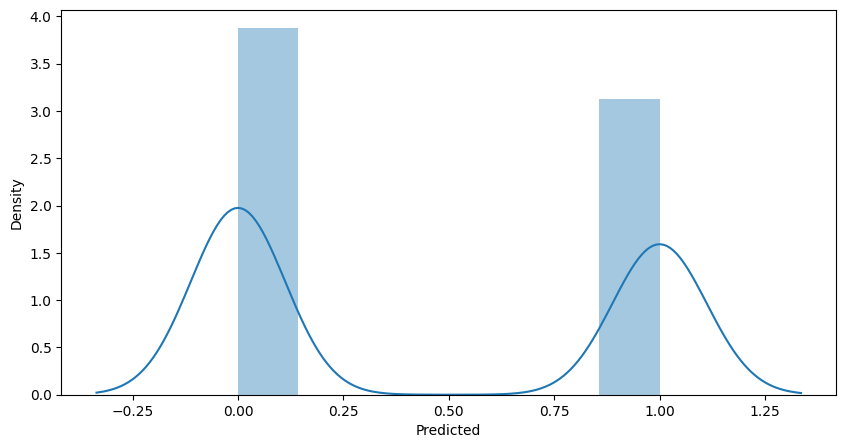

In [224]:
# Predicted Leads
plt.figure(figsize = [10,5])
sns.distplot(y_pred_final.Predicted)
plt.show()

In [218]:
y_pred_final['Lead Score'].median()

33.0

In [219]:
hot_leads = y_pred_final[y_pred_final['Lead Score']>y_pred_final['Lead Score'].median()]
hot_leads.head()

ProspectID  Converted  Converted_Prob  Predicted  Lead Score
5         4554          0        0.732690          1          73
10        4226          0        0.454071          1          45
11        1667          1        0.787654          1          79
14        6470          1        0.484396          1          48
16        4833          1        0.702503          1          70

In [220]:
# Conversion Rate
print(100*sum(hot_leads.Converted)/len(hot_leads['Converted'].index))

71.21387283236994


The above value of lead score i.e. 33.0 may be counted as a datum to select the probable targets as these leads have better lead scores.

The Model is having a Accuracy of 81% and a Precision score of 76%

**A ballpark of the target lead conversion rate is given to be around 80%, i.e. nothing but the Sensitivity/Recall score of the model which is found to be close to 80%**